# COGS 108 - What Makes A Review Helpful?

# Permissions
* [X] YES - make available
* [ ] NO - keep private

# Video

https://www.youtube.com/watch?v=P3JupqxoGzk

# Names

- Adrian Rosing (A16940210)
- Angelina Mkrtychyan (A16261733)
- Ashley Becker (A16743343)
- Hayden Dinh (A17090287)
- Zihan Liu (A16922237)

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import json
import gzip
import statsmodels.api as sm
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
from string import punctuation
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/arosing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/arosing/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arosing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Overview

Our project used the Health and Household and All Shopping Categories Amazon review data provided by the McAuley lab at UC San Diego, used EDA and linear/logistic regressions to determine which factors of a review correlated most with being perceived as helpful (as measured by helpful votes), then tested a Bag of Words and BERT deep learning model to determine which model was more accurate at predicting whether a review received helpful votes. Helpfulness votes were most impacted by review word length, followed by image inclusion, proportion of filler words, negative sentiment score, and low star rating. The BERT deep learning model outperformed the Bag of Words model at predicting whether a review was found helpful (73.53% versus 70.96% accuracy).

# Abstract

A crucial feature of user experience on online shopping platforms like Amazon is product reviews; however, sorting reviews of new items or products with hundreds of reviews to determine relevancy is a process that could be more optimally fine-tuned. Our project endeavored to improve the Amazon review system by using EDA and linear/logistic regressions to determine which factors of a review correlated most with being perceived as helpful (as measured by helpful votes), then test a Bag of Words and BERT deep learning model to determine which model was more accurate at predicting whether a review received helpful votes. Data was taken from subsets of the Health and Household shopping category and All Amazon categories databases provided by the McAuley lab at UC San Diego, which collected 571 million Amazon reviews from 2023 in all shopping categories.

Both preliminary EDA and LASSO regularization models showed correlations between helpfulness votes and image inclusion, number of words, proportion of filler words, negative sentiment score, and star rating of reviews. Linear regressions including these variables only explained a small proportion of the variance (adjusted R-squared of 0.060-0.069), and logistic regressions only explained twice as much of the variance (pseudo-R-squared of 0.1192-0.1564). Most variable distributions/model outcomes between the Health and All Categories datasets were comparable. The BERT deep learning model outperformed the Bag of Words model at predicting whether a review was found helpful (73.53% versus 70.96% accuracy). A model accounting for additional noise in the data and previously correlated non-textual factors like star rating and image inclusion would likely perform with even higher accuracy.


# Research Question

Out of whether an image is included, the proportion of filler words in a review, review length, and the sentiment of the review, etc., which factors are most important in determining the helpfulness of a product review, as measured using Amazon review data in the Health and Household category? Does a deep learning model outperform the conventional machine learning model using these factors? Lastly, does the model fitted on Health and Household reviews transfer to all amazon shopping categories? What about vice versa?

## Background and Prior Work

Amazon is the largest online retailer in the United States, with hundreds of billions of dollars in annual sales. A prominent feature on this site is its review section, where users who have previously purchased a product rate and review it. Many shoppers use this feature to determine which brands and products are worth buying; therefore, it would be important to create a system that boosts the most helpful reviews to the top of the section. This is often done by helpfulness ratings, where other users upvote a review they find particularly helpful. There are likely many elements of reviews that increase the number of helpfulness votes it receives. We choose to predict the helpfulness of Amazon reviews determined by the number of helpful votes. The review data comes from this research <a name="cite_data-1"></a>[<sup>1</sup>](#cite_data-1) that aims to bridge the text and items in recommender systems. This dataset contains Amazon review comments, the associated star rating, and the number of 'helpful' votes the review received from other users. In this project, we will try to determine whether a comment is helpful using the text and other factors associated with the review. The analysis could give information about what makes a comment valuable to others and could be very useful as a comment selection algorithm for similar e-commerce platforms for selecting potentially helpful reviews--especially for sites lacking helpfulness ratings or for newer products with fewer comment votes.

Some previous models have been created which draw relationships between the review text and the user's rating of the product.<a name="cite_ref-1"></a>[<sup>2</sup>](#cite_ref-1)<a name="cite_ref-2"></a>[<sup>3</sup>](#cite_ref-2) These projects are more aligned with the task of sentiment analysis: predicting the rating a user leaves using the sentiment of the text (e.g., whether the tone of the review is positive or negative). However, we want to predict whether other users will vote this comment to be helpful given the review text. Most text analysis projects on this dataset use methods like bags of words, TF-IDF, and deep learning models like LSTM or fine-tuned BERT. We plan to use similar methods in our project with the different objective of determining helpfulness. Other projects build recommender systems using the user-item interaction data in the review dataset. <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_ref-3) As far as we know, no other public projects try to predict the helpfulness of the review. Additionally, few previous projects use the Health and Household category data, but we found this subset of the dataset to be less biased compared to other categories (see Ethics section for further detail).

1. <a name="cite_data-1"></a> [^](#cite_data-1) Hou Y, Li J, He Z, et al. Bridging Language and Items for Retrieval and Recommendation[J]. arXiv preprint arXiv:2403.03952, 2024. https://arxiv.org/pdf/2403.03952
2. <a name="cite_ref-1"></a> [^](#cite_ref-1) https://www.kaggle.com/code/mahdifaour/amazon-food-reviews-lstm
3. <a name="cite_ref-2"></a> [^](#cite_ref-2) https://www.kaggle.com/code/shivangamsoni/sentiment-analysis-logistic-regression
4. <a name="cite_ref-3"></a> [^](#cite_ref-3) https://www.kaggle.com/code/luissalazarzendeja/amazon-product-recommendation-system

# Hypothesis


**Out of whether an image is included, the proportion of filler words in a review, review length, and the sentiment of the review, etc., which factors are most important in determining the helpfulness of a product review, as measured using Amazon review data in the Health and Household category?**

We hypothesized that the inclusion of images and the sentiment of the review are the most important factors in determining the helpfulness of a product review. This was based on the assumption that images provide additional valuable information, and extreme sentiments (very positive or very negative) offer clear, engaging perspectives that resonate more with readers. However, we acknowledged that other factors, such as the length of the review and the proportion of filler words, also contribute to the perceived helpfulness but are considered less prominent.

**Does a deep learning model outperform the conventional machine learning model using these factors?**

We expected a fine-tuned deep learning model to outperform conventional machine learning models in predicting the helpfulness of reviews. Deep learning models, particularly those incorporating pre-trained architectures, have demonstrated superior performance over traditional models in various domains such as natural language processing (NLP) and computer vision (CV). These models can learn complex patterns and features that human-engineered features might miss. By leveraging pre-trained models and fine-tuning them, we gain a deeper understanding of natural language, leading to more accurate predictions.

**Lastly, does the model fitted on Health and Household reviews transfer to all Amazon shopping categories? What about vice versa?**

We believed that a model trained on Health and Household reviews will generalize reasonably well to other categories, but its performance may not be as high as a model specifically trained on a more diverse dataset. Conversely, a model trained on a general dataset, encompassing a wide range of categories, was expected to perform better when applied to Health and Household reviews. This general model benefits from a broader understanding of review patterns across different categories, making it more transferable and effective in various contexts.

# Data

## Data overview

- Dataset #1:
  - Dataset Name: Amazon Health and Household Review Dataset
  - Link to the dataset: https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Health_and_Household.jsonl.gz
  - Number of observations: 17,105 (after filtering)
  - Summary: This dataset consists of reviews for products which belong to the 'Amazon Health and Household' subcategory. Of its variables, we are using the 'text', 'images', helpful_vote', and 'rating' columns, which we will use in order to extract a variety of features, such as # of images, length of review, sentiment of review (3 variables), proportion of filler words, and the number of helpful votes.

In [2]:
def load_data(dataset_path):
    data = []
    with gzip.open(dataset_path, 'rt', encoding='utf-8') as f:
        for line in f:
            toSave = json.loads(line.strip())
            
            if(toSave['verified_purchase']):
                data.append(toSave)

    df = pd.DataFrame(data)
    columns_to_drop = ['asin', 'parent_asin', 'user_id', 'timestamp', 'verified_purchase', 'title']
    df = df.drop(columns=columns_to_drop)

    df = df.dropna()
    return df
health_data = load_data("health_and_household_data.jsonl.gz")
health_data

,rating,text,images,helpful_vote
0,4.0,I wanted to love this bc it’s supposed to be g...,[{'small_image_url': 'https://m.media-amazon.c...,0
1,5.0,I use these to store yarn projects. I’m very ...,[],0
2,5.0,Smells great!,[],0
3,5.0,Where has this been all my life? Makes wrappi...,[],0
4,1.0,Amazon was out of my regular brand of Charmin ...,[{'small_image_url': 'https://images-na.ssl-im...,3
...,...,...,...,...
17100,5.0,These are comfortable and great,[],0
17101,4.0,My husband really liked it better than Gatorad...,[],0
17102,5.0,"Hard to find sometimes,works great",[],0
17103,5.0,Cute bags,[],0


This data, along with the all data seen below is our processed raw data, without our extracted features. We dropped several unnecessary columns, including 'asin', 'parent_asin', 'user_id', 'timestamp', 'verified_purchase', 'title' and all the remaining rows with null values while extracting in order to further clean the data. 

- Dataset #2
  - Dataset Name: Amazon General Review Dataset
  - Link to the dataset: https://amazon-reviews-2023.github.io/
  - Number of observations: 12,802 (after filtering)
  - Summary: This dataset consists of reviews for a wide variety of products accross Amazon. Of its variables, we are using the 'text', 'images', helpful_vote', and 'rating' columns, which we transform into several features such as # of images, length of review, sentiment of review (3 variables), proportion of filler words, and the number of helpful votes.

In [3]:
all_data = load_data("all_categories_data.jsonl.gz")
all_data

,rating,text,images,helpful_vote
0,5.0,This spray is really nice. It smells really go...,[],0
1,4.0,"This product does what I need it to do, I just...",[],1
2,5.0,"Smells good, feels great!",[],2
3,1.0,Felt synthetic,[],0
4,5.0,Love it,[],0
...,...,...,...,...
12797,5.0,So cute,[],0
12798,5.0,"We got it fast, it will last along time",[],0
12799,1.0,Horribly uncomfortable. Returned,[],1
12800,5.0,great stuff. It got me through my terrible per...,[],6


As seen above, this comparison dataset is slightly smaller, but was cleaned in the same way described above.

### Combination

We planned to combine our datasets by using the Amazon General Review Dataset as a validation set, in order to confirm if the conclusions we yielded from training on the more specific Amazon Health and Household Review Dataset reflected on Amazon reviews in general.

## Feature Extraction:

### Extracted Features and Their Descriptions

1. **Readability Score**
   - **Description**: This score measures the ease with which a text can be read. It's calculated using formulas like the Flesch-Kincaid readability test.
   - **Usefulness**: Reviews that are easier to read might be considered more helpful by a wider audience. A higher readability score indicates simpler text, which can be more accessible.


2. **Unique Word Count**
   - **Description**: This is the count of distinct words in the review, excluding common stopwords and punctuation.
   - **Usefulness**: A higher unique word count may indicate a more informative and varied review, which could be more helpful to readers.
   

3. **Length of Longest Word**
   - **Description**: This measures the number of characters in the longest word found in the review.
   - **Usefulness**: Reviews with longer words might reflect a higher level of sophistication or detail, which can impact perceived helpfulness.
   

4. **Number of Adjectives and Adverbs**
   - **Description**: This counts the adjectives and adverbs in the review, which are identified using part-of-speech tagging.
   - **Usefulness**: A higher count of descriptive words might indicate a more vivid and engaging review, potentially making it more helpful.
   

5. **Sentiment Scores (Negative, Neutral, Positive)**
   - **Description**: These scores measure the sentiment of the review text, indicating whether the review is predominantly negative, neutral, or positive.
   - **Usefulness**: Sentiment can affect helpfulness, as extremely negative or positive reviews might provide stronger opinions that readers find more decisive.


6. **Rating**
    - **Description**: This is the star rating provided by the reviewer for the product or service.
    - **Usefulness**: The rating can provide a quick summary of the reviewer's overall opinion. Higher ratings might correlate with more positive reviews and vice versa. This can influence the perceived helpfulness as readers might use the rating as an indicator of the review's trustworthiness.


7. **Word Count**
   - **Description**: This counts the total number of words in the review.
   - **Usefulness**: Longer reviews might be seen as more comprehensive and therefore more helpful, although excessively long reviews could be less so.
   

8. **Filler Word Proportion**
   - **Description**: This measures the proportion of filler words (like "um," "uh," "really," etc.) in the review.
   - **Usefulness**: A lower proportion of filler words might indicate a more concise and to-the-point review, which can be more helpful.
   

9. **Number of Images**
   - **Description**: This counts the number of images included with the review.
   - **Usefulness**: Reviews with images might provide more context or evidence for the reviewer's claims, increasing their perceived helpfulness.

Below are the methods we used to extract each feature.

In [4]:
### HELPER FUNCTIONS ###
# Described Further Below
def do_sentiment_analysis(df):
    df = df.copy()
    from transformers import AutoModelForSequenceClassification
    from transformers import AutoTokenizer, AutoConfig
    import numpy as np
    import torch
    import torch.nn.functional as F
    from torch.utils.data import DataLoader
    from tqdm import tqdm
    MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    config = AutoConfig.from_pretrained(MODEL)
    scores_all = []
    labels_all = []
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)
    dataloader = DataLoader(df['text'], batch_size = 512)
    for batch in tqdm(dataloader):
        encoded_input = tokenizer(batch, return_tensors='pt', padding = True, truncation = True, max_length = 100)
        encoded_input.to(device)
        with torch.no_grad():
            output = model(**encoded_input)
        scores = F.softmax(output.logits, dim=-1)
        labels = torch.argmax(scores, dim = -1).cpu().numpy()
        scores = scores.cpu().numpy()
        scores_all.extend(scores)
        labels_all.extend(labels)
    scores_all = np.array(scores_all)
    labels_all = np.array(labels_all)
    labels_text = []
    for label in labels_all:
        label_text = config.id2label[label]
        labels_text.append(label_text)
    df['Negative_score'] = scores_all[:, 0]
    df['Neutral_score'] = scores_all[:, 1]
    df['Positive_score'] = scores_all[:, 2]
    df['sentiment_labels'] = labels_text
    return df

# Returns tokenized sentence w/o punctuation
def with_filler(string):
    string = str(string).lower()
    word_tokens = word_tokenize(string)
    
    filtered_sentence = [word for word in word_tokens if word not in punctuation]
    additional_punctuation = ["’", "...", "..", "''", "``"]
    filtered_sentence = [word for word in filtered_sentence if word not in additional_punctuation]
    return filtered_sentence

# Returns tokenized sentence without stop words
def no_filler(string):
    stop_words = set(stopwords.words('english'))
    custom_filler = ["n't", "’", "'s", "...", "'ve", "'m", "also", "really", "much", "could", "would", "..", "''", "``"]
    string = str(string).lower()
    string = word_tokenize(string)
    
    filtered_sentence = []
    for word in string:
        if word not in stop_words:
            filtered_sentence.append(word)
    
    filtered_sentence = [word for word in filtered_sentence if word not in punctuation]
    filtered_sentence = [word for word in filtered_sentence if word not in custom_filler]

    return(filtered_sentence)

# Calculates proportion of stop words
def proportion(filtered, total):

    count_f = len(filtered)
    count_t = len(total)
    
    if count_t > 0:
        prop_nonfiller = count_f/count_t
        prop_filler = 1 - prop_nonfiller
    else:
        prop_filler = 0
    
    return prop_filler

# Using Flesch Formula to Calculate Readability Score
def readability_score(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0
    words = word_tokenize(text)
    syllable_count = sum([count_syllables(word) for word in words])
    words_per_sentence = len(words) / len(sentences)
    syllables_per_word = syllable_count / len(words)
    flesch_score = 206.835 - 1.015 * words_per_sentence - 84.6 * syllables_per_word
    return flesch_score

# Counts the numnber of syllabels 
def count_syllables(word):
    vowels = "aeiouy"
    word = word.lower()
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if word.endswith("le") and len(word) > 2 and word[-3] not in vowels:
        count += 1
    if count == 0:
        count += 1
    return count

# Returns Number of Unique Words
def unique_word_count(text):
    words = word_tokenize(text)
    unique_words = set(words) - set(stopwords.words('english')) - set(punctuation)
    return len(unique_words)


def length_of_longest_word(text):
    words = word_tokenize(text)
    alpha_words = [word for word in words if word.isalpha()]
    if len(alpha_words) == 0:
        return 0
    else:
        return max(len(word) for word in alpha_words)

def count_adjectives_adverbs(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    count = sum(1 for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB'))
    return count

# Calls all above functions
def extract_features(df):
    df['word_count'] = df['text'].apply(lambda x: len(word_tokenize(x)))
    df['filler_proportion']= df['text'].apply(lambda x: proportion(no_filler(x), with_filler(x)))
    df['readability_score'] = df['text'].apply(readability_score)
    df['unique_word_prop'] = df['text'].apply(unique_word_count) / df['word_count']
    df['length_of_longest_word'] = df['text'].apply(length_of_longest_word)
    df['adjectives_adverbs_prop'] = df['text'].apply(count_adjectives_adverbs) / df['word_count']
    df['num_images'] = df['images'].apply(lambda x: len(x))
    df = do_sentiment_analysis(df)
    df = df.fillna(0)
    return df


The first function, do_sentiment_analysis(df), assigns a sentiment score to the review text as a feature in our inferential analysis. We will perform the sentiment analysis here using a pre-trained RoBERTa-based sentiment analysis model.

The three next functions are used on the Health and Household and All Categories Amazon dataframes to find the proportion of filler words in reviews (further explained in the respective EDA section). The first function takes in a string and returns a list of all words used in the review. The second function takes in a string and returns a list of the non-filler words (excluding words like 'I,' 'were,' 'which,' etc.). The third function finds the proportion of filler words compared to all words in a string. These were later applied to the dataframe to create three columns: with_filler, no_filler, and proportion_filler.

We then executed the feature extraction procedures. We saved the result into a file to prevent repetitive processing, which is slow and does not run on JupyterHub.

In [5]:
# health_data = extract_features(health_data)
# health_data

In [6]:
# all_data = extract_features(all_data)
# all_data

In [7]:
### Saving Data To CSV ###
# all_data.to_csv("all_data.csv", index=False)
# health_data.to_csv("health_data.csv", index=False)

In [8]:
### Clearing out Unecessary Fields ###
# all_data.drop(['text', 'images', 'sentiment_labels', 'PCA_1', 'PCA_2'], axis=1, inplace=True)
# health_data.drop(['text', 'images', 'sentiment_labels', 'PCA_1', 'PCA_2'], axis=1, inplace=True)
# all_data.to_csv("all_data_features.csv", index=False)
# health_data.to_csv("health_data_features.csv", index=False)

We then loaded the processed data:

In [4]:
allData = pd.read_csv("all_data.csv")
healthData = pd.read_csv("health_data.csv")

all_data_features = pd.read_csv("all_data_features.csv")
health_data_features = pd.read_csv("health_data_features.csv")

Looking at the features from Health Data, we see:

In [10]:
health_data_features.head()

,rating,helpful_vote,word_count,filler_proportion,readability_score,unique_word_prop,length_of_longest_word,adjectives_adverbs_prop,num_images,Negative_score,Neutral_score,Positive_score
0,4.0,0,280,0.525210,72.869524,0.346429,12,0.175000,1,0.363125,0.224310,0.412565
1,5.0,0,16,0.615385,98.252500,0.437500,8,0.250000,0,0.001698,0.013949,0.984352
2,5.0,0,3,0.000000,119.190000,0.666667,6,0.333333,0,0.005595,0.022290,0.972114
3,5.0,0,17,0.533333,98.678088,0.470588,8,0.117647,0,0.017441,0.152391,0.830168
4,1.0,3,59,0.600000,69.982394,0.406780,10,0.101695,1,0.175734,0.551114,0.273152


In [11]:
print("Types (From All Data):")
print(healthData.dtypes)
print("\nFull Health Data Size: ", healthData.shape)
print("\nProcessed Health Data Size: ", health_data_features.shape)

Types (From All Data):
rating                     float64
text                        object
images                      object
helpful_vote                 int64
word_count                   int64
filler_proportion          float64
readability_score          float64
unique_word_prop           float64
length_of_longest_word       int64
adjectives_adverbs_prop    float64
num_images                   int64
Negative_score             float64
Neutral_score              float64
Positive_score             float64
sentiment_labels            object
PCA_1                      float64
PCA_2                      float64
dtype: object

Full Health Data Size:  (17105, 17)

Processed Health Data Size:  (17105, 12)


Altogether, the health data has 17 columns, all of which we will explore in our EDA and/or use as features for our final models, as described above. It has 17,105 values, all of which are non-null after our processing function runs. Example rows are shown above. Meanwhile, for our processed data, which only consists of key features, we filtered out the 'text', 'images', 'sentiment_labels', 'PCA_1', and 'PCA_2.'

In [12]:
all_data_features.head().head()

,rating,helpful_vote,word_count,filler_proportion,readability_score,unique_word_prop,length_of_longest_word,adjectives_adverbs_prop,num_images,Negative_score,Neutral_score,Positive_score
0,5.0,0,72,0.555556,95.95500,0.444444,9,0.111111,0,0.022482,0.059114,0.918404
1,4.0,1,53,0.595745,83.55239,0.396226,10,0.075472,0,0.571823,0.303327,0.124851
2,5.0,2,6,0.000000,116.14500,0.666667,6,0.500000,0,0.005203,0.011070,0.983727
3,1.0,0,2,0.000000,35.60500,1.000000,9,0.500000,0,0.480661,0.425515,0.093824
4,5.0,0,2,0.500000,120.20500,0.500000,4,0.000000,0,0.016990,0.097664,0.885345


In [13]:
print("Types:")
print(allData.dtypes)
print("\nFull All Data Size: ", allData.shape)
print("\nProcessed All Data Size: ", all_data_features.shape)

Types:
rating                     float64
text                        object
images                      object
helpful_vote                 int64
word_count                   int64
filler_proportion          float64
readability_score          float64
unique_word_prop           float64
length_of_longest_word       int64
adjectives_adverbs_prop    float64
num_images                   int64
Negative_score             float64
Neutral_score              float64
Positive_score             float64
sentiment_labels            object
PCA_1                      float64
PCA_2                      float64
dtype: object

Full All Data Size:  (12802, 17)

Processed All Data Size:  (12802, 12)


The allData has all of the same columns, with the same types as the health data. Its primary difference is that it is smaller than the primary healthData; it contains 12,802 samples.

# Exploratory Data Analysis

Due to the large number of features we extract from the text, we first took a glance at the data as a whole. Then, we took a closer look at a subset of variables that we thought could be more important in prediction of helpful votes.

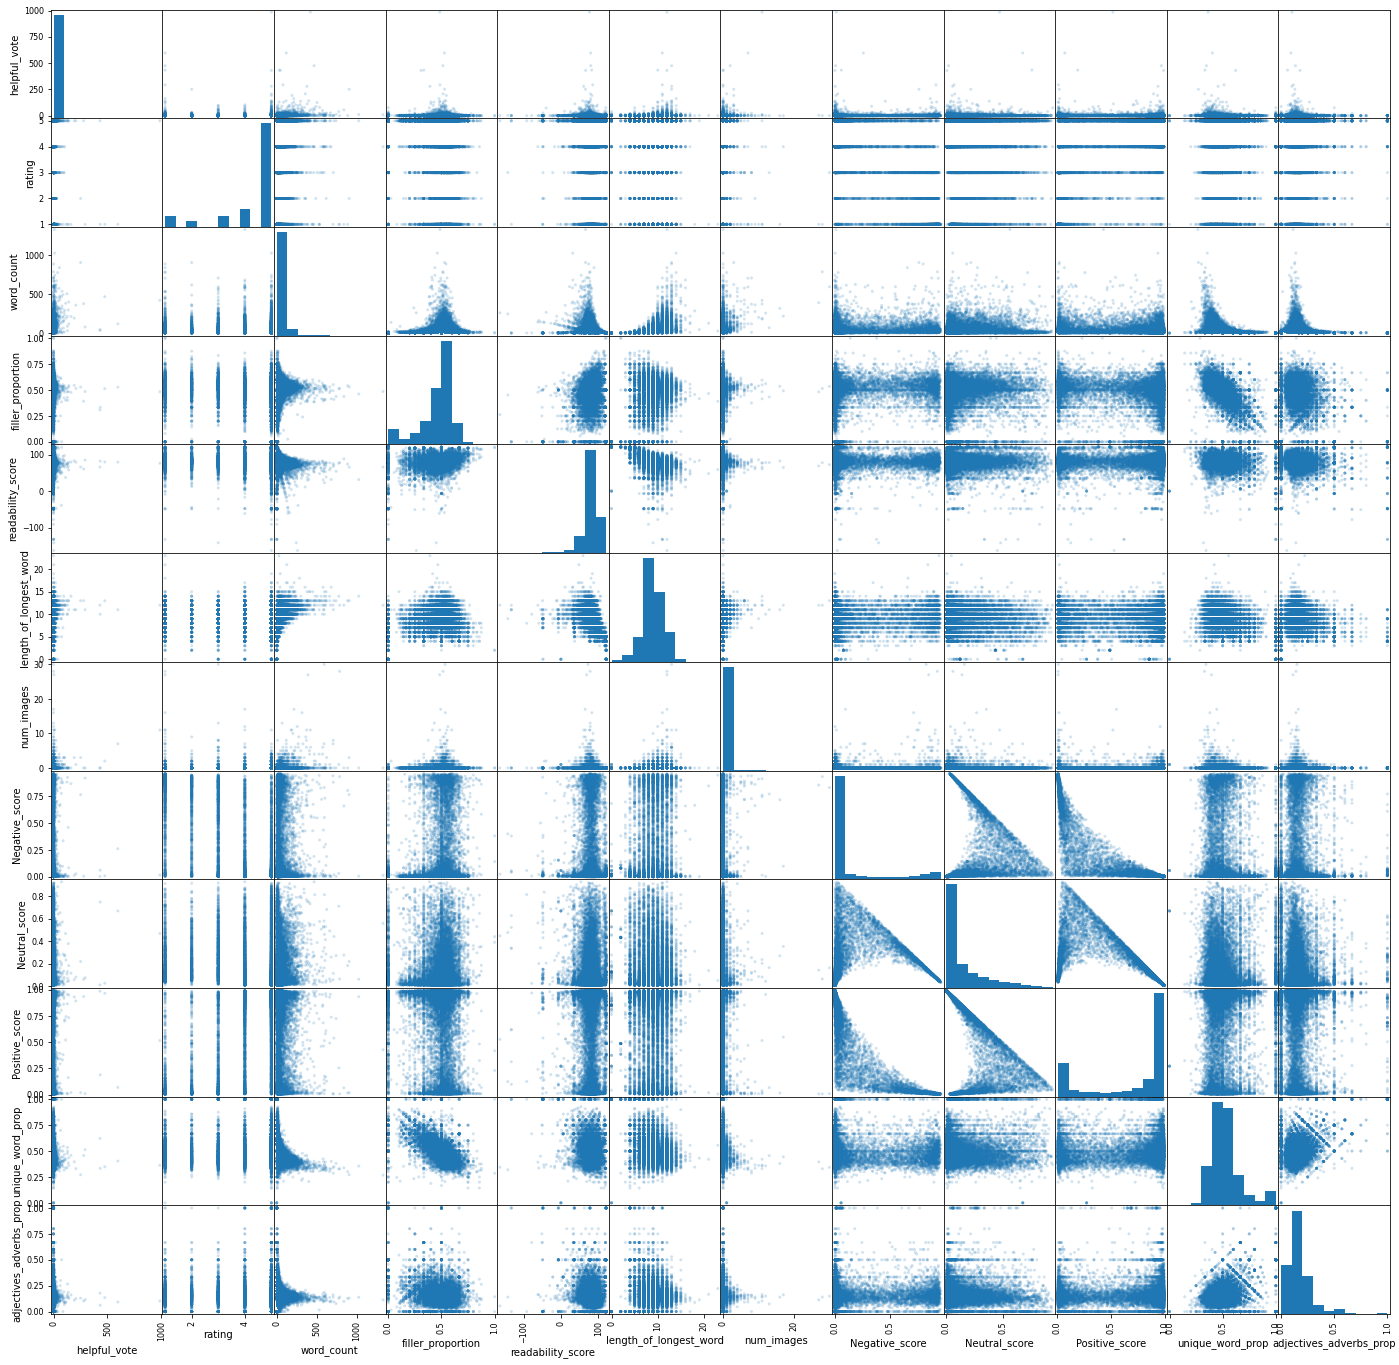

In [14]:
# Scatter Matrix for All Data
column_order = ["helpful_vote","rating","word_count","filler_proportion","readability_score","length_of_longest_word","num_images","Negative_score","Neutral_score","Positive_score","unique_word_prop","adjectives_adverbs_prop"]
fig = scatter_matrix(all_data_features[column_order], alpha=0.2, figsize=(24, 24), diagonal='hist')
plt.show()

Looking at the matrix of all datasets, there are a few variables that might correlate with the number of helpful votes received (as shown in the leftmost column of the matrix). For example, there is a cluster of reviews with a proportion of filler words ~0.5 that have more helpful votes. There are similar noticeable clusters looking at helpful votes and the proportion of adjectives/adverbs used, proportion of unique words, number of images, length of the longest word, readability score, and word count. Some variables like sentiment score and review star ratings are correlated. For example, the positive sentiment scores seem to be correlated with a higher star rating. Distributions of most variables are right-or-left-skewed, with the exception of positive sentiment scores, which are bimodal with modes at 0 and 1.

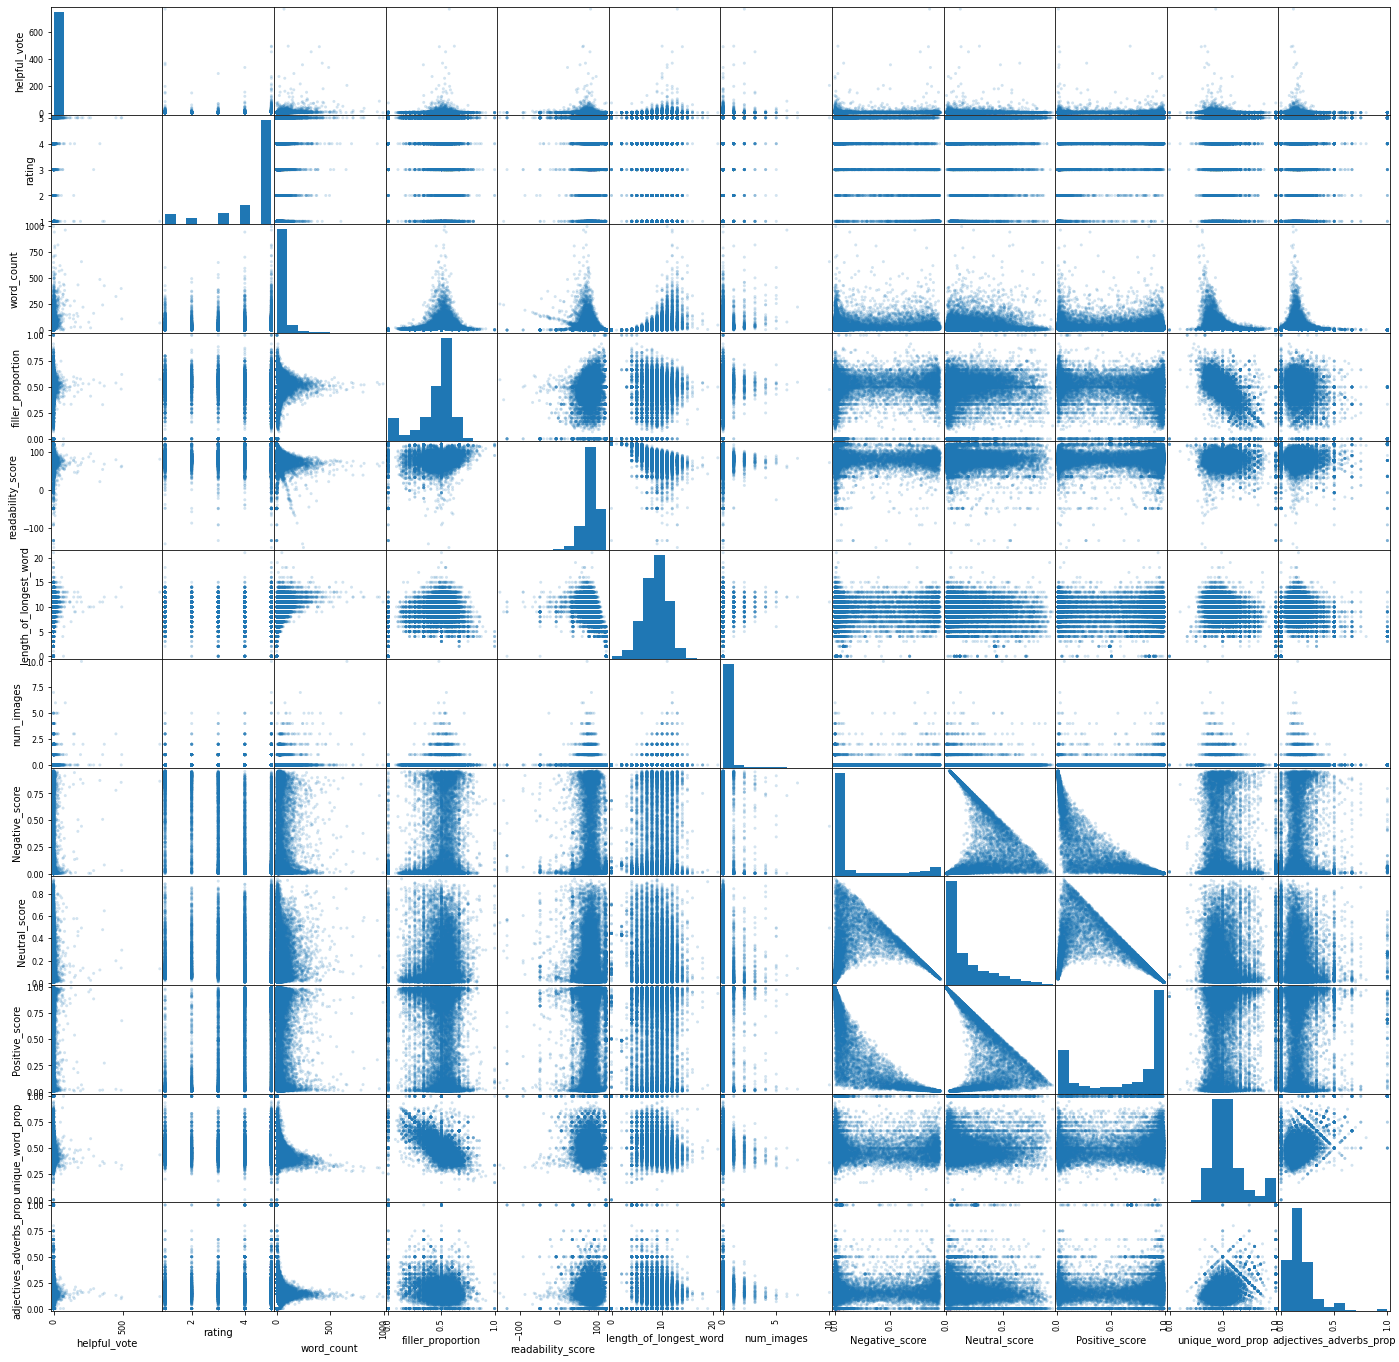

In [15]:
# Scatter matrix for Health and Household Data
fig = scatter_matrix(health_data_features[column_order], alpha=0.2, figsize=(24, 24), diagonal='hist')
plt.show()

The matrix of data for the Health and Household dataset looks similar to the distributions for All Amazon categories. Histogram skews/modes fall approximately around the same values, and the scatter plot trends have similar trends/densities. Because these graphs only give a snapshot into the general data trends, variables used in mixed effects models (helpfulness votes, number of images, star rating, proportion of filler words, review length, and sentiment scores) were further investigated.

## Helpfulness Votes

Since helpfulness votes are the dependent variable of interest, it is important to understand the basic distribution. The majority of reviews had fewer than 40 votes, so outliers with more than 40 votes were excluded. Because most reviews received 0 helpfulness votes, a second histogram is shown for each dataframe excluding reviews with 0 helpfulness votes so the distribution could be better observed.

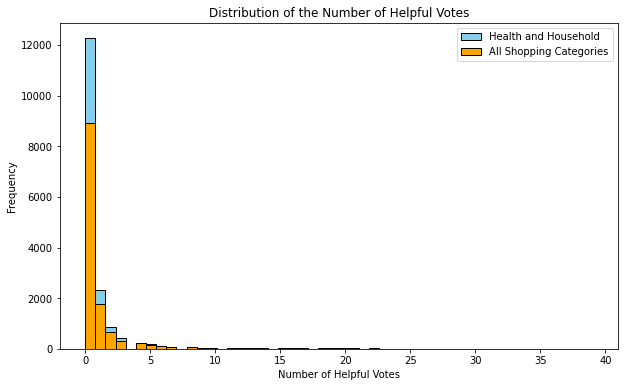

In [16]:
import matplotlib.pyplot as plt

# Histogram for All Data With <40 Votes
health_zoom = healthData[healthData.helpful_vote < 40]
all_zoom = allData[allData.helpful_vote < 40]
plt.figure(figsize=(10, 6))
plt.hist(health_zoom['helpful_vote'], bins=50, color='skyblue', edgecolor='black', label='Health and Household')
plt.hist(all_zoom['helpful_vote'], bins=50, color='orange', edgecolor='black', label='All Shopping Categories')

# Add labels and title
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Helpful Votes')
plt.legend()

plt.show()

As can be seen, the vast majority of reviews had no votes. The distributions between these two datasets appeared similar, although our general dataset 'All Shopping Categories' appeared to have a slightly higher frequency of more helpful votes than just the 'Health and Household' data.

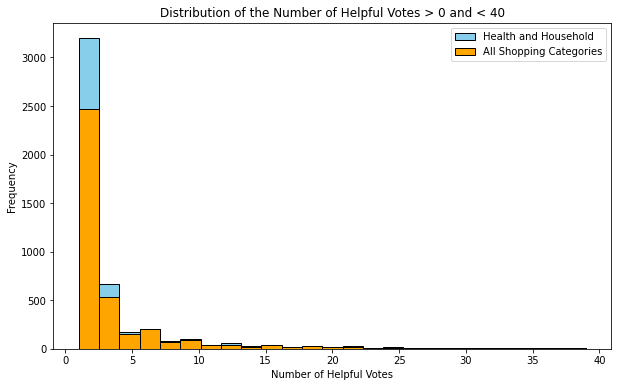

In [17]:
# Histogram for All Data Below 40 Votes and Excluding 0 Helpfulness Votes
health_zoom = healthData[(healthData.helpful_vote > 0) & (healthData.helpful_vote < 40)]
all_zoom = allData[(allData.helpful_vote > 0) & (allData.helpful_vote < 40)]
plt.figure(figsize=(10, 6))
plt.hist(health_zoom['helpful_vote'], bins=25, color='skyblue', edgecolor='black', label='Health and Household')
plt.hist(all_zoom['helpful_vote'], bins=25, color='orange', edgecolor='black', label='All Shopping Categories')

# Add labels and title
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Helpful Votes > 0 and < 40')
plt.legend()

plt.show()

In [18]:
# Comparing the averages of both datasets' helpful votes data to confirm similar distributions
healthAvg = healthData['helpful_vote'].mean()
allAvg = allData['helpful_vote'].mean()

print("Average helpful votes for Health and Household data: ", healthAvg)
print("Average helpful votes for All Shopping Categories data: ", allAvg)

Average helpful votes for Health and Household data:  1.576790412160187
Average helpful votes for All Shopping Categories data:  1.8108889236056867


The distribution of helpful votes in both categories had a right skew. The majority of reviews with that received any helpful votes received <10. While both the Health and All Shopping categories have a similar skew, there is a slightly higher frequency of Health reviews that received 1-2 votes and higher frequency of All Shopping reviews that received >5 votes. To test whether the differences between these datasets was significant, the average number of helpful votes were compared. The All Shopping Categories data was confirmed to have a slightly higher average number of helpful shopping votes. It is therefore likely that while the two groups have similar enough helpful votes data, the average number of helpful votes would be slightly higher for the All Shopping Categories data.

## Ratings

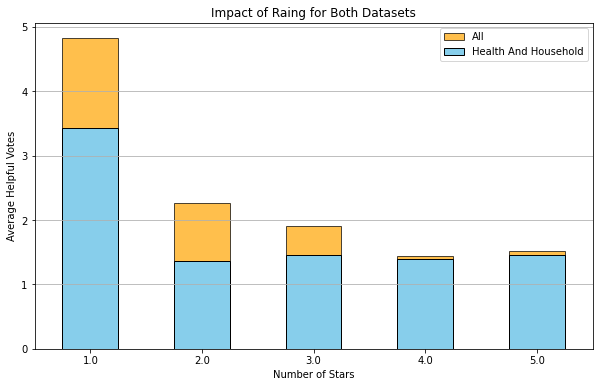

In [19]:
## Displaying Distribution of Ratings

# Plotting Both Datasets
plt.figure(figsize=(10, 6))

allData.groupby('rating')['helpful_vote'].mean().plot(kind='bar', color='orange', edgecolor = 'black', alpha=0.7, label='All')
healthData.groupby('rating')['helpful_vote'].mean().plot(kind='bar', color='skyblue', edgecolor = 'black', label='Health And Household')
plt.title('Impact of Raing for Both Datasets')
plt.xlabel('Number of Stars')
plt.ylabel('Average Helpful Votes')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

As can be seen above, for Health and Household and All Data, it is clear that poor reviews (i.e. if my review rated the product as 1 star), tended to be seen as helpful. While we do see that for All Data, lower reviews did tend to be more helpful, for health and household, the remaining 4 ratings were equally helpful on average. Altogether, it would appear that the rating given will be a predictor for helpfulness. However, it will only be a good predictor if the rating was 1 star.

In [20]:
# Creates a data frame with the number of data points containing # of images for Health and Household
health_rating_count = pd.DataFrame(healthData.rating.value_counts()).reset_index().sort_values(by = "rating").rename(columns = {"rating": "# of Stars", "count": "Count"})
print("Health and Household" + "\n" + health_rating_count.to_string(index=False))

# Creates a data frame with the number of data points containing # of images for all data
all_rating_count = pd.DataFrame(allData.rating.value_counts()).reset_index().sort_values(by = "rating").rename(columns = {"rating": "# of Stars", "count": "Count"})
print("All Data" + "\n" + all_rating_count.to_string(index=False))

Health and Household
 # of Stars  Count
        1.0   1171
        2.0    733
        3.0   1265
        4.0   2150
        5.0  11786
All Data
 # of Stars  Count
        1.0    962
        2.0    536
        3.0    929
        4.0   1552
        5.0   8823


The majority of reviews in the "Health and Household" category are highly positive, with 5-star ratings being the most common by a significant margin. There is a noticeable drop in the number of reviews as the rating decreases from 4 stars to 1 star. This trend appeared in All Data as well, with 5 stars being first, followed by 4 stars in frequency. 2 stars was always the least frequent review given.

## Images

Moving on to a new aspect of our analysis, we now explored the influence of images on the helpfulness votes that reviews receive. We conducted this analysis specifically for the Health and Household data, as well as for the overall dataset. By comparing these findings, we aimed to uncover any notable differences in how images impact review helpfulness across these categories.

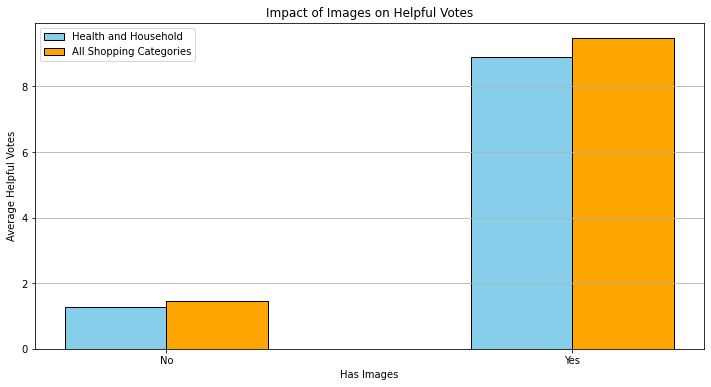

In [21]:
import matplotlib.pyplot as plt

# Binary Classifier
def has_images(images):
    if(images >= 1):
        return 'Yes'
    else:
        return 'No'

healthData['has_images'] = healthData['num_images'].apply(has_images)
allData['has_images'] = allData['num_images'].apply(has_images)

# Plotting
plt.figure(figsize=(12, 6))
health_grouped = healthData.groupby('has_images')['helpful_vote'].mean()
plt.bar(health_grouped.index, health_grouped.values, color='skyblue', edgecolor = 'black', label='Health and Household', width=0.25)  # Decrease width

# all Data
all_grouped = allData.groupby('has_images')['helpful_vote'].mean()
# Adjust x so that its readable
all_index = [i + 0.25 for i in range(len(all_grouped.index))]
plt.bar(all_index, all_grouped.values, color='orange', edgecolor = 'black', label='All Shopping Categories', width=0.25)  # Decrease width

# Add title and labels
plt.title('Impact of Images on Helpful Votes')
plt.xlabel('Has Images')
plt.ylabel('Average Helpful Votes')

# Adjusting Extra To Compensate
plt.xticks([i + .125 for i in range(len(health_grouped.index))], health_grouped.index)
plt.grid(axis='y')
plt.legend()

plt.show()

As we can see from our graphs, images appeared to play a major role in impacting helpful votes. Indeed, reviews with images tended to be approximately 8 times as helpful as reviews without images, for both Health and Household reviews and All Shopping Reviews. We dove a little deeper and looked at how the number of images affected helpfulness votes.

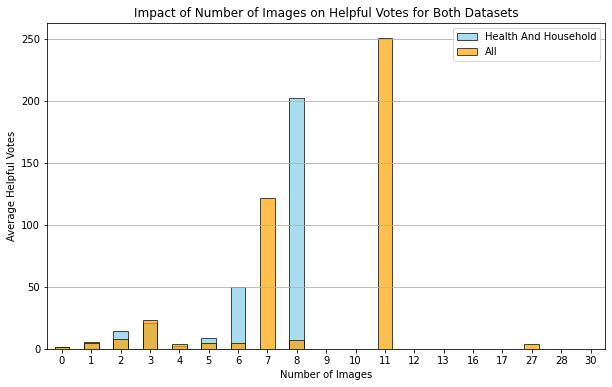

In [22]:
## Displaying Distribution of Number of Images

# Plotting Both Datasets
plt.figure(figsize=(10, 6))
healthData.groupby('num_images')['helpful_vote'].mean().plot(kind='bar', color='skyblue', edgecolor = 'black', alpha=0.7, label='Health And Household')
allData.groupby('num_images')['helpful_vote'].mean().plot(kind='bar', color='orange', edgecolor = 'black', alpha=0.7, label='All')
plt.title('Impact of Number of Images on Helpful Votes for Both Datasets')
plt.xlabel('Number of Images')
plt.ylabel('Average Helpful Votes')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Our graphs support our claim from before that images had a positive impact on helpful votes in a review. In the graphs, we saw an upward trend of average helpful votes as the number of images increases; however, we did not take into account the frequency of reviews with images. Thus, the average helpful votes for a specific number of images in reviews may not be an accurate representation if we do not have enough data.

In [23]:
# Creates a data frame with the number of data points containing # of images for Health and Household
health_count = pd.DataFrame(healthData.num_images.value_counts()).reset_index().sort_values(by = "num_images").rename(columns = {"num_images": "# of images in a review", "count": "Count"})
print("Health and Household" + "\n" + health_count.to_string(index=False))

# Creates a data frame with the number of data points containing # of images for all data
all_count = pd.DataFrame(allData.num_images.value_counts()).reset_index().sort_values(by = "num_images").rename(columns = {"num_images": "# of images in a review", "count": "Count"})
print("All Data" + "\n" + all_count.to_string(index=False))

Health and Household
 # of images in a review  Count
                       0  16451
                       1    445
                       2    134
                       3     44
                       4     18
                       5      9
                       6      2
                       7      1
                      10      1
All Data
 # of images in a review  Count
                       0  12240
                       1    334
                       2    117
                       3     45
                       4     26
                       5      9
                       6      8
                       7      5
                       8      4
                       9      2
                      10      1
                      11      4
                      12      1
                      13      1
                      16      1
                      17      1
                      27      1
                      28      1
                      30      1


Just like we thought, the more images a review had, the less data we had for it. Since only around 4% of the reviews in our data set have images, we will be unable to use images as our primary predictor, as the majority of our reviews will not have pictures. With that said, images had an impact on helpful votes; in general, having images in a review positively impacted the helpful votes for a review, but we will be wary of using this as a primary feature due to our lack of data.

## Review Length (Word Length)

In this section, we shifted our focus to a different attribute of the data. We looked at how the number of words in a review impacted the helpfulness vote that it got. Just as in the previous section, we did this both for the Health and Household data and for all the data.

To do this, we graphed the distribution of the word count (length) of a review and the number of reviews that had a certain length. Then, compared both datasets to see if they had significant differences.

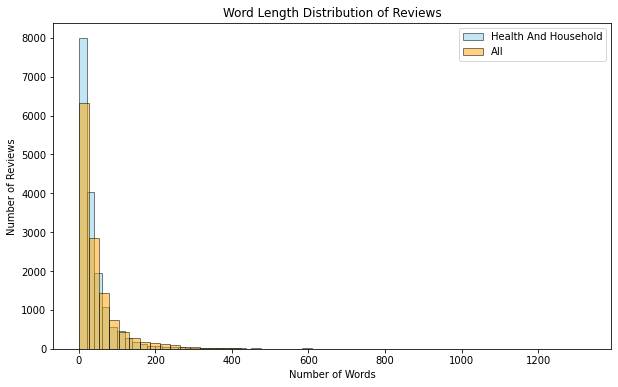

In [24]:
from scipy.stats import ks_2samp

# Plotting histogram distributions for health and all datas' word counts
plt.figure(figsize=(10, 6))
plt.hist(healthData['word_count'], bins=50, color='skyblue', alpha=0.5, edgecolor = 'black', label='Health And Household')
plt.hist(allData['word_count'], bins=50, color='orange', alpha=0.5, edgecolor = 'black', label='All')

plt.title('Word Length Distribution of Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.legend(loc='upper right')
plt.show()

As seen, there were some major outliers, as most of the data was concentrated within the of length 0-300 words. To be able to clearly observe the graphs and show a clear pattern, we removed the outliers of any reviews with more than 300 words from this analysis.

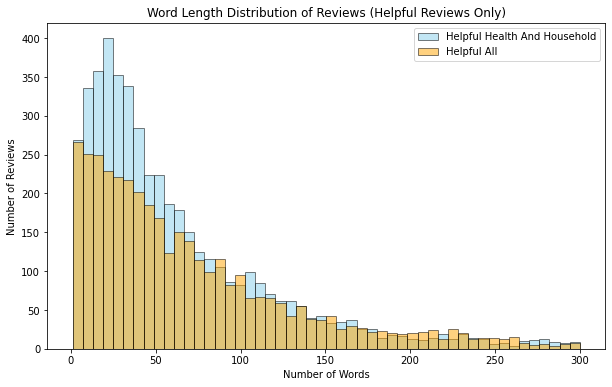

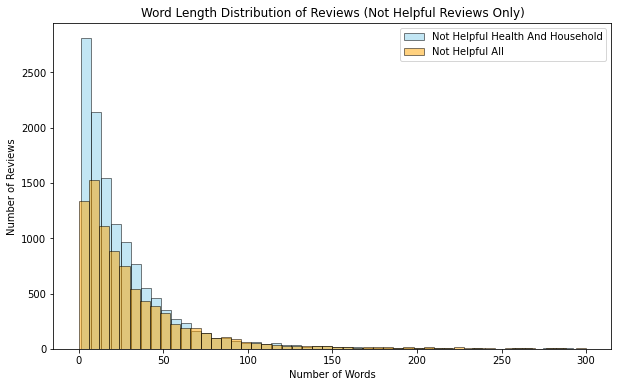

In [6]:
# Comparing Both Datasets for Helpful Reviews

# Removing outliers and sectioning for reviews that received 1+ helpful votes
health_helpful = healthData[(healthData['helpful_vote'] > 0) & (healthData['word_count'] <= 300)]
all_helpful = allData[(allData['helpful_vote'] > 0) & (allData['word_count'] <= 300)]

# Plotting Histograms
plt.figure(figsize=(10, 6))
plt.hist(health_helpful['word_count'], bins=50, color='skyblue', edgecolor = 'black', alpha=0.5, label='Helpful Health And Household')
plt.hist(all_helpful['word_count'], bins=50, color='orange', edgecolor = 'black', alpha=0.5, label='Helpful All')

plt.title('Word Length Distribution of Reviews (Helpful Reviews Only)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.legend(loc='upper right')
plt.show()

# Comparing Both Datasets for Not Helpful Reviews (0 helpful votes)

# Creating a df that removes word count outliers and only contains reviews with no helpful votes
not_helpful_health = healthData[(healthData['helpful_vote'] == 0) & (healthData['word_count'] <= 300)]
not_helpful_all = allData[(allData['helpful_vote'] == 0) & (allData['word_count'] <= 300)]

# Plotting Histograms
plt.figure(figsize=(10, 6))
plt.hist(not_helpful_health['word_count'], bins=50, color='skyblue', edgecolor = 'black', alpha=0.5, label='Not Helpful Health And Household')
plt.hist(not_helpful_all['word_count'], bins=50, color='orange', edgecolor = 'black', alpha=0.5, label='Not Helpful All')

plt.title('Word Length Distribution of Reviews (Not Helpful Reviews Only)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.legend(loc='upper right')
plt.show()

In [26]:
# Comparing distributions of health and household dataset and the all dataset for not helpful reviews

statistic, p_value = ks_2samp(health_helpful['word_count'], all_helpful['word_count'])

if p_value < 0.05:
    print("The distribution of the length of helpful reviews for both datasets ARE significantly different.")
else:
    print("The distribution of the length of helpful reviews for both datasets ARE NOT significantly different.")
    
    

# Comparing distributions of health and household dataset and the all dataset for not helpful reviews
    
statistic, p_value = ks_2samp(not_helpful_health['word_count'], not_helpful_all['word_count'])

if p_value < 0.05:
    print("The distribution of the length of not helpful reviews for both datasets ARE significantly different.")
else:
    print("The distribution of the length of not helpful reviews for both datasets ARE NOT significantly different.")

The distribution of the length of helpful reviews for both datasets ARE significantly different.
The distribution of the length of not helpful reviews for both datasets ARE significantly different.


From these results, we saw that there was a statistically significant difference between both datasets. The reason we separated the original dataset was to remove as much bias as possible. This is because, certain categories, such as Beauty & Personal Care may have a gender bias, as it is likely that females left more reviews in this example category. We chose the Health & Household category as it seemed to have the least amount of bias as everyone would need to obtain products from this category and there is no obvious bias. We would have tried to check this with data, but since the reviews are completely anonymous, we did not know which ones were left by a male, female, etc. Thus, we concluded that it is possible that bias did indeed affect the All Dataset.

Next, for each dataset we compared the helpful and not helpful distributions to see if word length truly impacted helpfulness, or if they were about the same for both and word length did not make a significant difference.

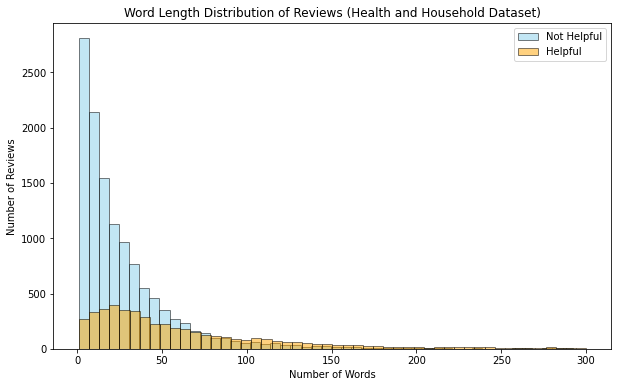

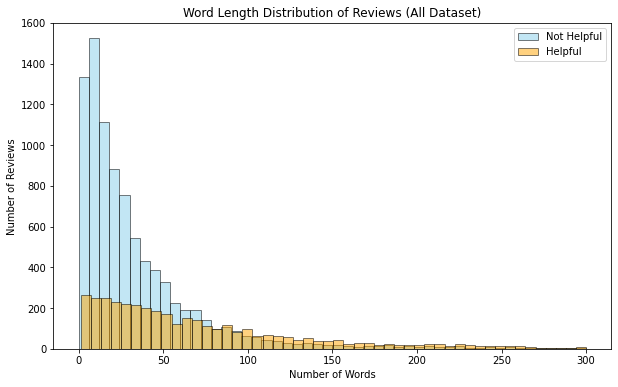

In [9]:
# Comparing Helpful and Not Helpful Reviews for Health and Household Dataset 
plt.figure(figsize=(10, 6))
plt.hist(not_helpful_health['word_count'], bins=50, color='skyblue', alpha=0.5, edgecolor = 'black', label='Not Helpful')
plt.hist(health_helpful['word_count'], bins=50, color='orange', alpha=0.5, edgecolor = 'black', label='Helpful')
plt.title('Word Length Distribution of Reviews (Health and Household Dataset)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.legend(loc='upper right')
plt.show()



# Comparing Helpful and Not Helpful Reviews for the All Dataset 
plt.figure(figsize=(10, 6))
plt.hist(not_helpful_all['word_count'], bins=50, color='skyblue', alpha=0.5, edgecolor = 'black', label='Not Helpful')
plt.hist(all_helpful['word_count'], bins=50, color='orange', alpha=0.5, edgecolor = 'black', label='Helpful')
plt.title('Word Length Distribution of Reviews (All Dataset)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.legend(loc='upper right')
plt.show()

In [18]:
# Comparing distributions of helpful and not helpful reviews for the health and household dataset
from scipy.stats import ks_2samp

statistic, p_value =ks_2samp(health_helpful['word_count'], not_helpful_health['word_count'])
print("To examine the difference between helpful review and non-helpful review lengths, we found: ")
if p_value < 0.05:
    print("The distribution of the length of helpful reviews for the health datasets IS significantly different.")
else:
    print("The distribution of the length of helpful reviews for both datasets ARE NOT significantly different.")
    
    

# Comparing distributions of helpful and not helpful reviews for the all dataset
    
statistic, p_value = ks_2samp(all_helpful['word_count'], not_helpful_all['word_count'])

if p_value < 0.05:
    print("The distribution of the length of not helpful reviews for the all dataset IS significantly different.")
else:
    print("The distribution of the length of not helpful reviews for the all dataset IS NOT significantly different.")

To examine the difference between helpful review and non-helpful review lengths, we found: 
The distribution of the length of helpful reviews for the health datasets IS significantly different.
The distribution of the length of not helpful reviews for the all dataset IS significantly different.


Given the basic p-value tests both yielded a p-value <0.05, there is at least a 95% chance that the length of the review significantly correlates with whether a vote will be helpful or not for both datasets.

## Filler Words

The next step was to look at the proportion of filler words in the dataset. This was done by using three functions. The first function is called **with_filler**, which takes a string input and uses the nltk package to parse the string into individual words (using word_tokenize), then remove all punctuation. Additional punctuation in the reviews not caught by nltk's punctuation list (e.g., weird apostraphes) were also removed.

In [29]:
# Loading the health and household dataframe
health_prop_data = healthData

# Call the dataframe with All Amazon category reviews
all_prop_data = allData

# Using the with_filler function on the Health and Household, then General Amazon dataframes
health_prop_data['review_withfillerwords'] = health_prop_data['text'].apply(with_filler)
all_prop_data['review_withfillerwords'] = all_prop_data['text'].apply(with_filler)

The second function, **no_filler**, takes a string input and uses the nltk package to parse the string into individual words (using word_tokenize), remove all filler words, then remove all punctuation. This was used to create a column creating a list of words in the review cutting out fillers like "to" and "and".

This function was refined twice using the Health and Household dataset, then the General Amazon dataset, to identify additional punctuation and filler words that were not caught by the original functions but appeared in the majority of reviews (e.g., the top 100 most frequent words used in reviews after filler words and punctuation were removed). These words were defined in a list called custom_filler and filtered out as well.

In [30]:
# Applying the no_filler function to the Health and Household Dataset
health_prop_data['review_nofillerwords'] = health_prop_data['text'].apply(no_filler)

# Applying the no_filler function to the Amazon General Dataset and checking the new valuecounts
# Apply the no_filler_alpha function to the dataframe
all_prop_data['review_nofillerwords'] = all_prop_data['text'].apply(no_filler)


# Look at the most frequent words in the health and household reviews data by using pd.explode and saving result as a dataframe
health_prop_exploded = health_prop_data.explode('review_nofillerwords')
word_count_h = health_prop_exploded['review_nofillerwords'].value_counts()
most_frequent_words_h = word_count_h.reset_index()
most_frequent_words_h.columns = ['review_nofillerwords', 'Frequency']

# Use the same process to create a dataframe of counts for the most frequent words in the general dataframe reviews
all_prop_exploded = all_prop_data.explode('review_nofillerwords')
word_count = all_prop_exploded['review_nofillerwords'].value_counts()
most_frequent_words = word_count.reset_index()
most_frequent_words.columns = ['review_nofillerwords', 'Frequency']

# Show Results
print('Health and Household Most Frequent Words \n', most_frequent_words_h.head(10))
print('\n All Categories Most Frequent Words \n', most_frequent_words.head(10))

Health and Household Most Frequent Words 
   review_nofillerwords  Frequency
0                   br       4158
1                great       3712
2                 good       3204
3                  use       2905
4                 like       2755
5              product       2719
6                  one       2230
7                 well       1959
8                 love       1815
9                works       1706

 All Categories Most Frequent Words 
   review_nofillerwords  Frequency
0                great       2787
1                   br       2667
2                  one       2453
3                 like       2235
4                 love       2078
5                 good       2013
6                  use       1536
7                 well       1482
8              reviews       1358
9                  get       1215


Of the 10 most recurring words in the Health and Household reviews, 8 also appeared in the top 10 most frequent words in the All Amazon Categories reviews. The word "br" (likely referring to bedroom/bathroom) is much more frequent in the Health and Household dataframe. This is likely because a larger proportion of products in this category were targeted/used in these rooms compared to the proportion of products in the entire Amazon store used in these rooms.

The third function, called **proportion**, took the inputs of rows for the columns generated by the no_filler (review_nofiller) and with_filler (review_withfiller) functions and generate a proportion of non-filler words to total words. Because this yielded a proportion of **NONFILLER** words, this proportion was subtracted from 1 to find the proportion of filler words.

In [31]:
# Using the proportion function on the dataframes using 'review_nofillerwords' as filtered and 'review_withfillerwords' as total
health_prop_data['proportion_filler'] = health_prop_data.apply(lambda row: proportion(row['review_nofillerwords'], row['review_withfillerwords']), axis = 1)
all_prop_data['proportion_filler'] = all_prop_data.apply(lambda row: proportion(row['review_nofillerwords'], row['review_withfillerwords']), axis = 1)

health_prop_data.head()

,rating,text,images,helpful_vote,word_count,filler_proportion,readability_score,unique_word_prop,length_of_longest_word,adjectives_adverbs_prop,...,Negative_score,Neutral_score,Positive_score,sentiment_labels,PCA_1,PCA_2,has_images,review_withfillerwords,review_nofillerwords,proportion_filler
0,4.0,I wanted to love this bc it’s supposed to be g...,[{'small_image_url': 'https://m.media-amazon.c...,0,280,0.525210,72.869524,0.346429,12,0.175000,...,0.363125,0.224310,0.412565,positive,0.165774,-0.211496,Yes,"[i, wanted, to, love, this, bc, it, s, suppose...","[wanted, love, bc, supposed, great, preserving...",0.525210
1,5.0,I use these to store yarn projects. I’m very ...,[],0,16,0.615385,98.252500,0.437500,8,0.250000,...,0.001698,0.013949,0.984352,positive,-0.178944,0.024819,No,"[i, use, these, to, store, yarn, projects, i, ...","[use, store, yarn, projects, happy]",0.615385
2,5.0,Smells great!,[],0,3,0.000000,119.190000,0.666667,6,0.333333,...,0.005595,0.022290,0.972114,positive,-0.184486,0.035821,No,"[smells, great]","[smells, great]",0.000000
3,5.0,Where has this been all my life? Makes wrappi...,[],0,17,0.533333,98.678088,0.470588,8,0.117647,...,0.017441,0.152391,0.830168,positive,-0.053352,-0.011117,No,"[where, has, this, been, all, my, life, makes,...","[life, makes, wrapping, clay, sheets, easy, br...",0.533333
4,1.0,Amazon was out of my regular brand of Charmin ...,[{'small_image_url': 'https://images-na.ssl-im...,3,59,0.600000,69.982394,0.406780,10,0.101695,...,0.175734,0.551114,0.273152,neutral,0.161304,0.027047,Yes,"[amazon, was, out, of, my, regular, brand, of,...","[amazon, regular, brand, charmin, purchased, z...",0.600000


A histogram was created for both the Health and Household data and the General Amazon data to gauge the distribution of filler word proportions.

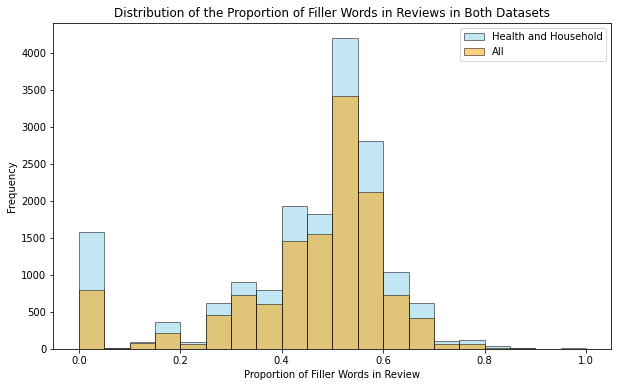

In [32]:
# Histogram for Health and Household Data and the All Data
plt.figure(figsize=(10, 6))
plt.hist(health_prop_data['proportion_filler'], bins = 20, color = 'skyblue', alpha=0.5, edgecolor = 'black', label='Health and Household')
plt.hist(all_prop_data['proportion_filler'], bins = 20, color = 'orange', alpha=0.5, edgecolor = 'black', label='All')
plt.xlabel('Proportion of Filler Words in Review')
plt.ylabel('Frequency')
plt.title('Distribution of the Proportion of Filler Words in Reviews in Both Datasets')
plt.legend(loc='upper right')
plt.show()

Some outliers can be seen for proportions above 0.8 for the Health and Household categories, so these outliers were removed.

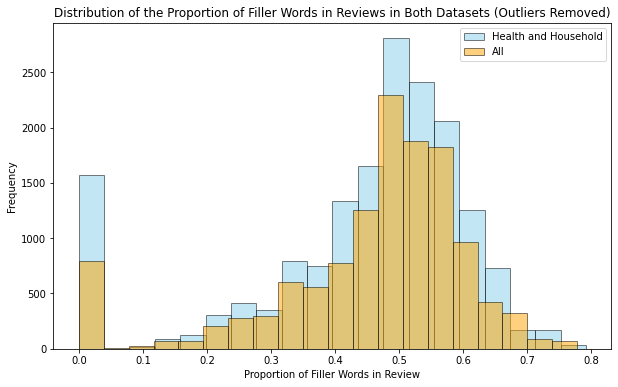

In [33]:
# Removing Outliers
plt.figure(figsize=(10, 6))
health_prop_data_cleaned = health_prop_data[health_prop_data.proportion_filler < 0.8]
all_prop_data_cleaned = all_prop_data[all_prop_data.proportion_filler < 0.8]


# New Histogram
plt.hist(health_prop_data_cleaned['proportion_filler'], bins = 20, color = 'skyblue', alpha=0.5, edgecolor = 'black', label='Health and Household')
plt.hist(all_prop_data_cleaned['proportion_filler'], bins = 20, color = 'orange', alpha=0.5, edgecolor = 'black', label='All')
plt.xlabel('Proportion of Filler Words in Review')
plt.ylabel('Frequency')
plt.title('Distribution of the Proportion of Filler Words in Reviews in Both Datasets (Outliers Removed)')
plt.legend(loc='upper right')
plt.show()

The highest frequency is around 50% filler words in the review for the Health and Household dataset. The distribution is non-Gaussian because of the high frequency of reviews with 0% filler words (~1500 reviews).

This proportion histogram for the All Amazon Categories data looks very similar to the histogram for the Health and Household category, with the highest frequency of filler words ~50% and a notable amount of reviews with no filler words. The mode/distribution of this data is also slightly to the left compared to the Health and Household data.

The last exploratory look into the filler words proportion was its correlation to helpfulness reviews. We did this for both datasets.

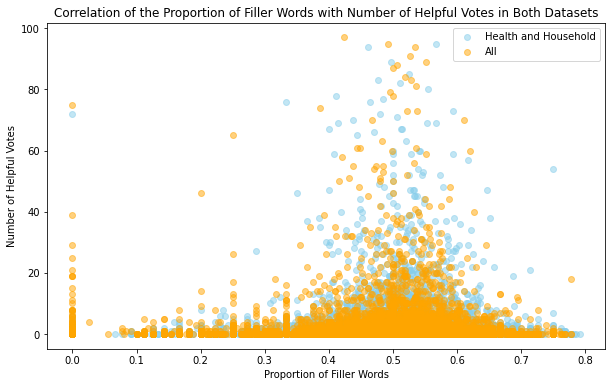

In [34]:
# Creating the scatterplot for proportion of filler words v helpful votes 
# The same helpful vote restrictions used for the word length helpful votes were used here
health_prop_data_cleaned = health_prop_data_cleaned[(health_prop_data_cleaned['helpful_vote'] <= 100)]
all_prop_data_cleaned = all_prop_data_cleaned[(all_prop_data_cleaned['helpful_vote'] <= 100)]


plt.figure(figsize=(10,6))
plt.scatter(health_prop_data_cleaned['proportion_filler'], health_prop_data_cleaned['helpful_vote'], color='skyblue', alpha = .5, label='Health and Household')
plt.scatter(all_prop_data_cleaned['proportion_filler'], all_prop_data_cleaned['helpful_vote'], color='orange', alpha = .5, label='All')

plt.title('Correlation of the Proportion of Filler Words with Number of Helpful Votes in Both Datasets')
plt.xlabel('Proportion of Filler Words')
plt.ylabel('Number of Helpful Votes')
plt.legend(loc='upper right')
plt.show()

While most reviews received 0 helpful votes regardless of the proportion of filler words, there seemed to be a more likely chance of having more helpful votes when the proportion of filler words was between 0.4 and 0.6. This was the case for both the Health and Household dataset and the All Amazon Categories dataset. Both dataset correlation trends look very similar.

## Sentiment Analysis

### Distribution of Sentiment Scores

Another important factor in a review is its general tone, or sentiment. In the sentiment analysis task, the model gives a probability that the sentence is positive/neutral/negative. For each review, these three probabilities add up to one. With that in mind, we can check the distribution of such probabilities across the three labels on the two datasets.

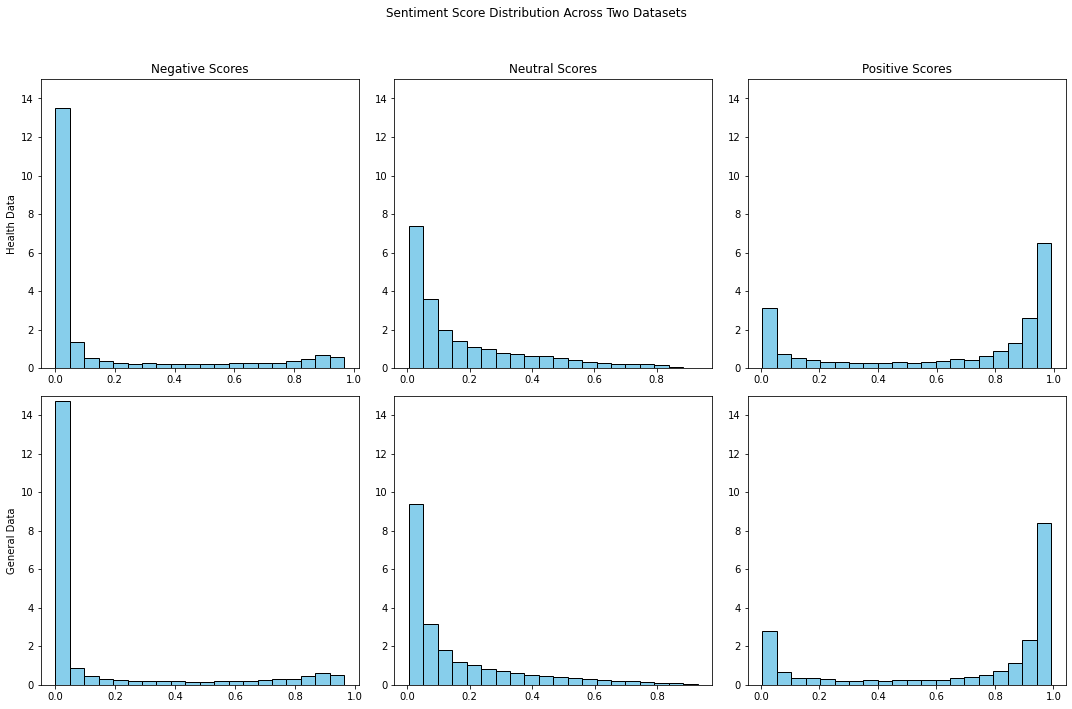

In [35]:
data = [
    [healthData['Negative_score'], healthData['Neutral_score'], healthData['Positive_score']],
    [allData['Negative_score'], allData['Neutral_score'], allData['Positive_score']]
]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sentiment Score Distribution Across Two Datasets')

# Titles for the rows and columns
row_titles = ['Health Data', 'General Data']
col_titles = ['Negative Scores', 'Neutral Scores', 'Positive Scores']

for i in range(2):
    for j in range(3):
        axs[i, j].hist(data[i][j], bins=20, color='skyblue', edgecolor='black', density=True)
        axs[i, j].set_ylim(0, 15)  # Set the same y-axis limits for all subplots
        if i == 0:
            axs[i, j].set_title(col_titles[j])
        if j == 0:
            axs[i, j].set_ylabel(row_titles[i])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to make space for the main title

# Show plot
plt.show()

The distribution shapes for the Health and Household data sentiment scores (top) were similar to those for the All Categories dataset (bottom). We observed that the distribution of sentiment scores for positive, neutral, and negative scores were distinct from each other. There was a bimodal distribution of positive sentiment scores, indicating a high presence of scores with little to no positive words and scores with very positive words. Comparatively, there were far fewer reviews with extremely negative sentiment scores. The neutral reviews also had a right skew, but the decline in proportions was more gradual than for the positive/negative scores. We hypothesized that reviews with a highly negative sentiment score could be seen more helpful since they might also provide information about the drawbacks of the products.

### PCA of Sentence Embedding

Lastly, we generated sentence embeddings for each review text using sentence transformers (we chose T5 here) and performed PCA to extract the two most important axes from the embedding. We then checked if there's any pattern in the scatter plot of the dimension of decomposition to determine the explainability of helpfulness in this dataset with deep learning methods. Ideally, we should see some parts of the plot to have more helpful comments than other parts, indicating that the embedding generated by the sentence embedding model captured the underlying factors to explain whether a review is helpful.

In [36]:
# Creating a function that performs PCA with sentence embedding
def generate_sentence_embedding(sentences):
    import torch
    from sentence_transformers import SentenceTransformer
    from sklearn.decomposition import PCA
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    text_embedding_model = SentenceTransformer('sentence-transformers/sentence-t5-base').to(device)
    embeddings = text_embedding_model.encode(sentences, convert_to_numpy=True, batch_size= 512, show_progress_bar=True)
    pca = PCA(n_components = 2)
    decomposed = pca.fit_transform(embeddings)
    return decomposed
# uncomment the below code if you wanna run the sentence embedding model and the PCA again.
# decomposed_health = generate_sentence_embedding(healthData['text'])
# decomposed_general = generate_sentence_embedding(allData['text'])
# healthData['PCA_1'] = decomposed_health[:, 0]
# healthData['PCA_2'] = decomposed_health[:, 1]
# allData['PCA_1'] = decomposed_general[:, 0]
# allData['PCA_2'] = decomposed_general[:, 1]
# healthData.to_csv('health_data.csv', index=False)
# allData.to_csv('all_data.csv', index=False)

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Function that creates a scatter plot of the PCA Analysis
def plot_pca_scatter(data, title):
    sampled_data = data.sample(n=5000, random_state=1)
    colors = ['orange' if x > 1 else 'skyblue' for x in sampled_data['helpful_vote']]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(sampled_data['PCA_1'], sampled_data['PCA_2'], c=colors, alpha=0.25)
    plt.title(title)
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    
    # custom legend
    orange_patch = mpatches.Patch(color='orange', label='> 1 helpful votes')
    skyblue_patch = mpatches.Patch(color='skyblue', label='<= 1 helpful votes')
    plt.legend(handles=[orange_patch, skyblue_patch], loc='upper right')
    
    plt.show()


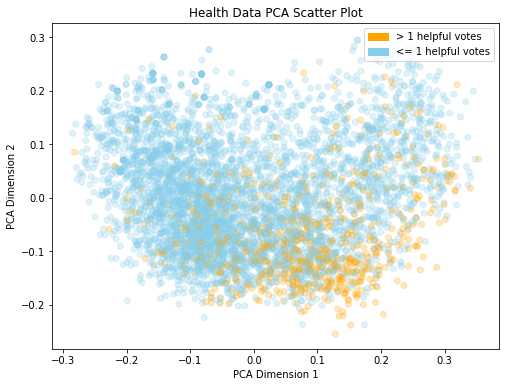

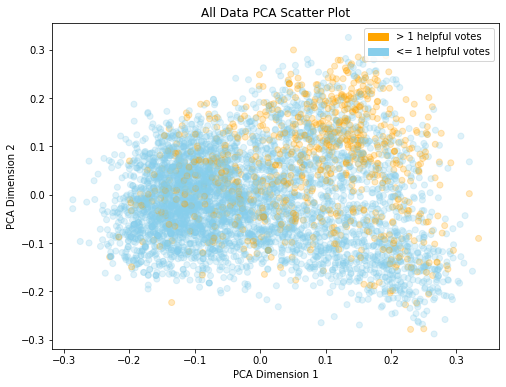

In [38]:
# Health and Household PCA Scatterplot
plot_pca_scatter(healthData, 'Health Data PCA Scatter Plot')


# All Categories PCA Scatterplot
plot_pca_scatter(allData, 'All Data PCA Scatter Plot')

The bottom right of the Health and Household PCA plot and the top right of the All Amazon Data PCA plot have more orange points than blue points. This indicates that the sentence embedding model, without any fine-tuning, can capture some underlying pattern in whether a review is helpful for both datasets, though the results might differ slightly. We therefore expect that a fine-tuned language model would be capable of predicting the helpfulness votes of the reviews.

 ## EDA Takeaways

With some exceptions, the All Amazon Categories dataset and Health and Household dataset have similar enough variable distributions/comparisons to be translatable to each other. One notable exception to this is review word length, where the Health and Household category has a slightly higher average word length. Additionally, the PCA analyses between the Health and Household versus All Amazon categories yield slightly different areas of the graph where there are more clusters of reviews with >5 helpful votes.

Whether a review has images seems to have a positive correlation with the number of helpful votes for both datasets. The distributions for word length of reviews with helpful votes are significantly different from no helpful votes, but the modes/shapes are slightly different between the Health and Household versus All Categories datasets. In the Health and Household data, the helpful votes word count peaks closer to 25 words (versus 0) and the no-helpful votes word count peaks closer to 0 (versus 10). The correlation between the proportion of filler words and the number of helpful votes has a similar distribution for both datasets, with an increase in likelihood that a review will receive helpfulness votes if it has around 40-60% filler words. The distribution of positive, neutral, and negative sentiments of reviews are each unique. The positive sentiment distribution has a right skew, the neutral sentiment distribution has a more gradual right skew, and the negative sentiment is bimodal at extreme ends of the graph (indicating extremely positive or extremely negative reviews).

# Predictive Analysis

## Simple Predictive Analysis with Extracted Features

### Variable Selection

We chose to use LASSO to select the most important variables within the extracted features and answer the question of "which factors are most important in determining the helpfulness of a product review?" LASSO (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that includes a regularization term. It aims to enhance the prediction accuracy and interpretability of the statistical model it produces. LASSO adds a penalty equivalent to the absolute value of the magnitude of the coefficients to the regression model. This penalty term can shrink some coefficients to zero, effectively selecting a simpler model that only includes the most significant predictors. This feature makes LASSO particularly useful when dealing with datasets that have many predictors, as it helps in both variable selection and regularization. 

We plotted the LASSO regularization path plot to identify the most important variables in predicting helpful votes. The LASSO regularization path plot illustrates how the coefficients of the regression model's features change as the regularization parameter, lambda ($\lambda$), varies. The x-axis represents the lambda values, where a small lambda corresponds to little regularization and a large lambda indicates strong regularization. The y-axis shows the magnitude of the regression coefficients for each feature, with each line representing a specific feature. As lambda increases, the coefficients are increasingly penalized and gradually shrink towards zero. Features with coefficients that remain non-zero at higher lambda values are more significant, while those that shrink to zero quickly are less significant.

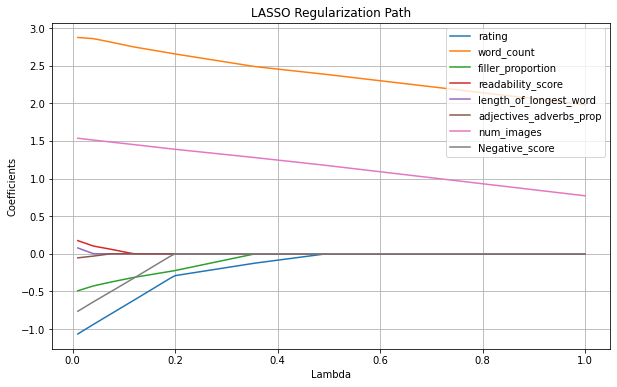

In [39]:
### Create Graph of LASSO - ALL DATA ###

# Get data
y = all_data_features["helpful_vote"]
X = all_data_features.drop(columns=["helpful_vote", "Neutral_score", 'unique_word_prop', 'Positive_score'])

# Apply Model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lambdas = np.linspace(0.01, 1, 100)

coefficients = []

# Apply Lambdas
for l in lambdas:
    lasso = Lasso(alpha=l, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefficients.append(lasso.coef_)

coefficients = np.array(coefficients)

# Plot
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(lambdas, coefficients[:, i], label=X.columns[i])

plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('LASSO Regularization Path for All Data')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Based on this graph, word count and number of images seem to have the greatest correlations with helpful votes. Star rating, proportion of filler words, and negative reviews all have smaller, but still potentially significant, negative scores.

The code below performs LASSO regression on the All Categories dataset with a specified regularization strength of lambda = 0.1 to identify the most important variables. After scaling the feature matrix X, the LASSO model was fitted to the standardized data. The resulting coefficients were examined to determine which features have non-zero coefficients. Features with non-zero coefficients are considered important, as LASSO did not shrink their impact to equal zero. These selected features were identified and listed by checking which coefficients are non-zero. The final output is a list of the selected covariates that were deemed significant by the LASSO model, facilitating feature selection by highlighting variables that contribute meaningfully to the predictive model.

In [40]:
chosen_lambda = 0.1
lasso = Lasso(alpha=chosen_lambda, max_iter=10000)
lasso.fit(X_scaled, y)

coefficients = lasso.coef_
selected_covariates_all = X.columns[coefficients != 0]

print("Selected covariates:", selected_covariates_all.tolist())

Selected covariates: ['rating', 'word_count', 'filler_proportion', 'readability_score', 'num_images', 'Negative_score']


The LASSO model identified star rating, review word count, proportion of filler words, readability score, number of images, and negative sentiment score as variables that significantly predicted a review's helpful votes. Combining this information with the above graph, word count and the rating were identified as the two most important factors. The rating and proportion of filler words were the third and fourth most important factors.

We performed the same operations to the Health and Household dataset:

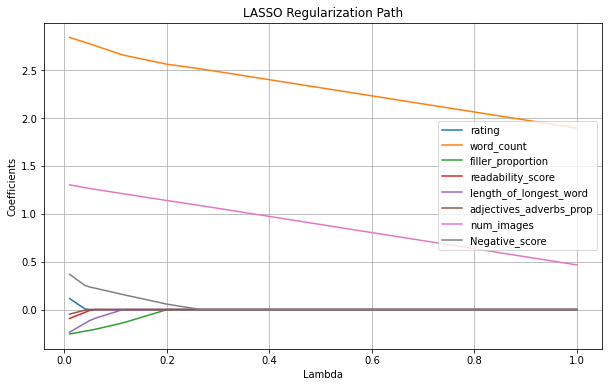

In [41]:
### Generate LASSO Graph on Health Data ###
y = health_data_features["helpful_vote"]
X = health_data_features.drop(columns=["helpful_vote", "Neutral_score", 'unique_word_prop', 'Positive_score'])

# Fit Model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run on different lambdas
lambdas = np.linspace(0.01, 1, 100)

coefficients = []

for l in lambdas:
    lasso = Lasso(alpha=l, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefficients.append(lasso.coef_)

coefficients = np.array(coefficients)

# Plot
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(lambdas, coefficients[:, i], label=X.columns[i])

plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('LASSO Regularization Path for Health and Household')
plt.legend(loc='best')
plt.grid(True)
plt.show()

While word count and number of images had similar correlation strengths in the Health and Household dataset, the negative sentiment score now had a positive association that was seemingly larger than proportion of filler words and rating.

We then performed a LASSO regression like we did for the All Categories data.

In [42]:
chosen_lambda = 0.1
lasso = Lasso(alpha=chosen_lambda, max_iter=10000)
lasso.fit(X_scaled, y)

coefficients = lasso.coef_
selected_covariates_health = X.columns[coefficients != 0]

print("Selected covariates:", selected_covariates_health.tolist())

Selected covariates: ['word_count', 'filler_proportion', 'length_of_longest_word', 'num_images', 'Negative_score']


Compared to the All Categories model, readability score was no longer a significant predictor. Additionally, while there is a similar trend in the importance of word count and number of images contributing to the prediction of helpful votes, other variables had much lower coeffcients, which indicates they were less important when predicting the helpful votes in the health and household dataset. This indicates that the two datasets are slightly different, especially regarding textual elements like readability and sentiment.

### Linear Regression

In [43]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Gather Data
X = health_data_features[selected_covariates_health.tolist()]
X = sm.add_constant(X)
y = health_data_features["helpful_vote"]

# Generate Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#model:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           helpful_vote   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          1.80e-195
Time:                        05:08:53   Log-Likelihood:                -53662.
No. Observations:               13684   AIC:                         1.073e+05
Df Residuals:                   13678   BIC:                         1.074e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Looking at the linear regression results for the Health and Household dataset, word count, proportion of filler words, number of images, and negative sentiment score all significantly correlated with the number of helpful votes; however, the adjusted/R-squared statistic was incredibly small (0.064/0.065), meaning that this model explained a sliver of the variance in the data. To ensure the accuracy of our results, we put this data into a predictive model and compared it to a native predictor, which predicts the average RMSE.

In [44]:
#Check accuracy
y_pred = model.predict(X_test)
r_squared_test = model.rsquared
print(f'R-squared on the test data: {r_squared_test}')
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE on the test data: {rmse_test}')

R-squared on the test data: 0.06467650616405474
RMSE on the test data: 11.237041244680109


We compared the result to a naive predictor that always predicts the average of the label.

In [45]:
np.std(y_test)

11.769408404352916

The linear regression only performed negligibly better than the naive average predictor (11.23 v 11.77), meaning it did not sufficiently predict the number of helpful votes using its given predictor variables.

To see if this was also the case for the All Categories dataset, we repeated the same process.

In [46]:
# Gather Data
X = all_data_features[selected_covariates_all.tolist()]
X = sm.add_constant(X)
y = all_data_features["helpful_vote"]

# Generate Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#model:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           helpful_vote   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          8.58e-158
Time:                        05:08:54   Log-Likelihood:                -39313.
No. Observations:               10241   AIC:                         7.864e+04
Df Residuals:                   10234   BIC:                         7.869e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5402      0.84

The star rating, word count, proportion of filler words, number of images, and negative sentiment score also had a significant correlation with the number of helpful votes in the All Categories dataset; however the adjusted/R-squared were similarly low (0.70), meaning that the regression model explained a very small portion of the actual variance.

We again checked this regression model against the Health and Household regression model to see if the coefficients were similar enough for both models to be comparable to each other (i.e., to see if the Health and Household results were significantly similar to the All Categories dataset).

In [47]:
#Check accuracy
y_pred = model.predict(X_test)
r_squared_test = model.rsquared
print(f'R-squared on the test data: {r_squared_test}')
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE on the test data: {rmse_test}')

R-squared on the test data: 0.07025384844752403
RMSE on the test data: 22.73472087384677


While the coeffcient of variables of the two models were similar, since the R-squared for both models were too low, it's hard to deduce whether the similar coefficients indicate that a model fitted on the Health and Household dataset is applicable to the All Categories datset. 

We then compared the All Categories regression model to the naive predictor.

In [48]:
np.std(y_test)

23.20007042783807

Similarly, the linear regression only performed slightly bit better than the naive average predictor.

Most of our selected variables were statistically significant, indicating their usefulness. However, the R-squared statistics of the models fitted on both datasets were around 6%-7%, showing that only a small proportion of the variability in the helpfulness votes was explained by the model. It is likely that the large amount of noise in the helpful votes of reviews was left uncaptured  by our predictors.

The substantial noise and randomness in the helpful votes of reviews on an e-commerce platform can be attributed to several factors. Firstly, the subjective nature of what individuals find helpful varies greatly, as each user has unique preferences, expectations, and experiences. Additionally, the timing of when a review is posted can influence its visibility and the likelihood of receiving votes, with more recent or prominently displayed reviews garnering more attention. User engagement levels also play a role--some users are more inclined to vote on reviews than others, contributing to inconsistent voting patterns. Furthermore, external factors such as promotions, marketing campaigns, and social influences can impact user behavior unpredictably. These elements collectively introduce significant variability and unpredictability in the helpful vote counts of reviews, making them inherently noisy and random.

Thus, we decided to fit classification models instead of regression models to alleviate the random noise problem in predicting helpful votes for reviews on an e-commerce platform. The classification task, which predicts whether a review receives more than one helpful vote, helps reduce the inherent variability and sensitivity to random fluctuations present in regression tasks that predict exact vote counts. By simplifying the problem space into binary outcomes, the model can generalize better and focus on significant patterns that indicate helpfulness, rather than being bogged down by minor variations in exact vote numbers. Additionally, classification tasks are more robust to outliers, treating extreme values within the same category and thus minimizing their disproportionate impact on predictions. This approach not only enhances the model's ability to capture meaningful patterns but also provides clearer, more actionable insights for decision-making on the platform. By focusing on broader criteria of helpfulness, classification models offer more stable, reliable, and interpretable predictions, ultimately improving the evaluation of review helpfulness.

### Logistic Regression

Here we marked a review to be helpful if it has >1 helpful votes and fit a logistic regression model to predict the binary helpfulness label using the same variables. We started with the Health and Household dataset.

In [49]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Gather Data
X = health_data_features[selected_covariates_health.tolist()]
X = sm.add_constant(X)
y = health_data_features["helpful_vote"] > 1

# Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit model
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.355043
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           helpful_vote   No. Observations:                13684
Model:                          Logit   Df Residuals:                    13678
Method:                           MLE   Df Model:                            5
Date:                Wed, 12 Jun 2024   Pseudo R-squ.:                  0.1536
Time:                        05:09:05   Log-Likelihood:                -4858.4
converged:                       True   LL-Null:                       -5739.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.2998      0.157    -27.375      0.000      -4.608      

In [50]:
# See how it performed
y_pred = model.predict(X_test) > 0.5  # Threshold at 0.5
accuracy = (y_pred == y_test).mean()
print(f'Accuracy on test data: {accuracy:.2f}')

Accuracy on test data: 0.87


We also compared this model to the naive model that always predicts False

In [51]:
y_test.value_counts()[False] / y_test.shape[0]

0.8611517100263081

While the word count, proportion of filler words, length of longest word, number of images, and negative sentiment score all significantly correlate with the number of helpful votes (p<0.001), the logistic regression model still doesn't outperform the naive predictor by a lot. Additionally, the pseudo R-squared statistic is very small (0.1536), explaining <1/5 of the variance.

To see if this was also the case for the All Categories dataset, we followed the same procedure.

In [52]:
# Setting up data.
X = all_data_features[selected_covariates_all.tolist()]
X = sm.add_constant(X)
y = all_data_features["helpful_vote"] > 1

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit logistic regression model on training data
model = sm.Logit(y_train, X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.395605
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           helpful_vote   No. Observations:                10241
Model:                          Logit   Df Residuals:                    10234
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Jun 2024   Pseudo R-squ.:                  0.1226
Time:                        05:09:14   Log-Likelihood:                -4051.4
converged:                       True   LL-Null:                       -4617.7
Covariance Type:            nonrobust   LLR p-value:                1.863e-241
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6388      0.216     -7.594      0.000      -2.062      -1.216
rating  

In [53]:
# See how it performed.
y_pred = model.predict(X_test) > 0.5  # Threshold at 0.5
accuracy = (y_pred == y_test).mean()
print(f'Accuracy on test data: {accuracy:.4f}')

Accuracy on test data: 0.8454


We observed a similar situation in the All Categories dataset. Rating, word count, proportion of filler words, and number of images (though not negative sentiment score) all had significant correlatons (p<0.05); however, the pseudo R-squared was 0.1226 and the accuracy was low. This likely indicates that the extracted features were not strong enough to predict the helpfulness of reviews in addition to the randomness of the helpful vote data. We therefore pivoted to explore NLP techniques as a means of better predicting the helpfulness of reviews.

# Predictive Analysis with NLP techniques

To see if machine learning could better predict helpfulness votes than regression models, we trained NLP models that rely on only the review text to predict the helpfulness of the reviews. Due to time limit, we only trained the NLP models on the Health and Household dataset.

## Data Preparation

Compared to the subset of data used in conducting the EDA, we needed more data to train an NLP model purely based on text, so we used a separate, larger subset of the Health and Household data to train and test the deep learning model. In the data preprocessing, we explicitly balanced the data so the number of reviews marked as helpful equal the number of reviews marked as unhelpful. By balancing the number of un/helpful reviews, the model would hopefully provide more insight into what determines helpfulness. However, because this way of balancing the data distribution in the test set made it significantly different, we could not directly compare the performance of the deep learning models to the regression models.

In [3]:
data = []
with gzip.open("Health_and_Household.jsonl.gz", 'rb') as f:
    for line in tqdm(f):
        d = json.loads(line.strip())
        if d["verified_purchase"]:
            data.append([d["parent_asin"], d["rating"], d["text"], d["helpful_vote"], d["images"]])
data_helpful = []
data_not_helpful = []
for d in data:
    if d[3] > 1:
        data_helpful.append(d)
    else:
        data_not_helpful.append(d)
np.random.seed(2024)
np.random.shuffle(data_not_helpful)
sampled_data_not_helpful = data_not_helpful[:len(data_helpful)]
final_data = data_helpful + sampled_data_not_helpful
np.random.shuffle(final_data)
pd.DataFrame(final_data, columns=["parent_asin", "rating", "text", "helpful_vote", "images"]).to_csv("Health_and_Household.csv", index=False)

25631345it [03:58, 107376.53it/s]


Here, we tagged a review to be helpful when it has more than 1 helpful vote.

In [4]:
all_data = pd.read_csv("Health_and_Household.csv").dropna().reset_index(drop=True)
all_data['helpful_vote'] = all_data['helpful_vote'].apply(lambda x: 1 if x > 1 else 0)
all_data

,parent_asin,rating,text,helpful_vote,images
0,B09TWP3C6Q,5.0,"Work really great on fluffing up bath towels, ...",0,[]
1,B001G7QG2M,2.0,need to take too many capsules to satisfy dail...,1,[]
2,B094QF7SF6,5.0,I love these toothbrush covers. I replaced the...,0,[]
3,B08CGQ4RGG,5.0,This is much cheaper than the stuff I have bee...,1,[]
4,B088PNK96K,5.0,We love the convenience<br />Very busy lifesty...,1,[]
...,...,...,...,...,...
6232242,B0176ZE7PU,5.0,It is easy to use. It gets the job done.,0,[]
6232243,B01E7MBSL6,5.0,This pillow massager is so effective and easy ...,0,[]
6232244,B002HNSEQU,5.0,"We have a 3-sided propane fireplace, and the g...",0,[]
6232245,B09KP6SR8K,1.0,Grab Green has re-formulated their laundry pro...,1,[]


As shown below, there's a even distribution of helpful and non-helpful votes in this dataset.

In [5]:
all_data['helpful_vote'].value_counts()

helpful_vote
1    3116592
0    3115655
Name: count, dtype: int64

## Bag of Words

The Bag of Words (BoW) model is a simple and commonly used technique in natural language processing for text representation. In this model, text data is transformed into fixed-size vectors based on word frequency. The BoW model treats each document as a collection of individual words, disregarding grammar and word order, but keeping multiplicity.

To create these vectors, the CountVectorizer in the code tokenizes the text, builds a vocabulary of the most frequent 1000 words, and counts the occurrences of each word in the documents. Each document is then represented as a vector of these counts. This vectorized representation is used as input for machine learning models.

In the code, after transforming the text data using the BoW model, logistic regression is applied. Logistic regression is a classification algorithm that predicts the probability of a binary outcome (helpful or not helpful). By training the logistic regression model on the word count vectors of the training data, the model learns to associate word patterns with the helpfulness of reviews. The model's performance is then evaluated by predicting the helpfulness of reviews in the test set and calculating the accuracy of these predictions.

In [6]:
# Creating test and training data
test_data = all_data.iloc[:5000, :].reset_index(drop=True)
training_data = all_data.iloc[10000:1005000, :].reset_index(drop=True)

# Vectorizing
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(training_data['text'])
y_train = training_data['helpful_vote']

# Creating models
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Testing the models
X_test = vectorizer.transform(test_data['text'])
y_test = test_data['helpful_vote']

# Testing model prediction/accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7096


The BoW model had a 70.96% accuracy rating on its ability to predict whether a review received more than one helpful vote based on text alone. For reference, a random predictor would achieve about 0.5 accuracy. This was a much better performance in the NLP model than the previous logistic regression model. This could be due to two reasons: (1) more balanced data distribution helps the model to learn more useful features to differentiate helpful and unhelpful reviews. (2) the NLP models have access to richer features that are useful for predicting helpfulness of the reviews, compared to previous models which only extracted a small handful of features we selected.

However, the BoW model doesn't account for sentiment, and given what limited conclusions we could make from the correlations/LASSO models, sentiment likely plays a role in whether a person considers a review helpful. We therefore trained a deep learning model and compared the results.

## Deep Learning Model


### Model Architecture
BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained transformer model designed for natural language understanding tasks. It captures context from both directions in a text sequence. In BERT, each input sequence is prepended with a special [CLS] token, which stands for "classification." The hidden state corresponding to this token in the final layer is used as a summary of the entire sequence, useful for classification tasks. We fine-tuned a pre-trained BERT model on the classification task. We choose the bert-large-uncased transformer encoder model with 24-layer, 1024 hidden dimension, and 16 attention heads as our base model. The input of the model is the tokenized review text. We extracted the hidden state of the summary token ([CLS]) prepended to the input ids as the input to the classifier network. Detailed training scripts are in other files of this repo. We only show the model architecture and the inference process in this notebook.

1. **Initialization and Setup:**
    - `SentimentBert` class initializes the BERT model ("bert-large-uncased").
    - Adds a dropout layer and a custom classifier (Classifier).

2. **Model Setup:**
    - `model_setup` method loads the pre-trained BERT model.

3. **Forward Method:**
    - Receives tokenized text sequences.
    - Passes inputs through the BERT encoder, obtaining the last layer's hidden states.
    - Extracts the `[CLS]` token's hidden state.
    - Passes this through the dropout layer.
    - Feeds the result to the classifier.

4. **Classifier:**
    - Consists of a linear layer, ReLU activation, and another linear layer.
    - Maps the representation to two output logits (helpful or not helpful).

5. **Prediction:**
    - The logits indicate the model's confidence in the review being helpful.
    - During training, these logits are compared to the true labels to update the model's parameters.
    - The model fine-tunes BERT on the task, learning to capture nuances in review text that correlate with helpfulness.

In [7]:
import torch  
from torch import nn
from transformers import BertModel


class SentimentBert(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.model_setup()

        self.dropout = nn.Dropout(config['dropout'])
        self.classifier = Classifier()

    def model_setup(self):
        self.encoder = BertModel.from_pretrained("bert-large-uncased")

    def forward(self, inputs):
        encoder_outputs = self.encoder(**inputs)
        last_hidden_states = encoder_outputs.last_hidden_state
        cls_tok = last_hidden_states[:, 0, :]
        dropout_outputs = self.dropout(cls_tok)
        output = self.classifier(dropout_outputs)
        return output


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        input_dim = 1024
        self.top = nn.Linear(input_dim, input_dim)
        self.relu = nn.ReLU(inplace=True)
        self.bottom = nn.Linear(input_dim, 2)

    def forward(self, hidden):
        middle = self.relu(self.top(hidden))
        logit = self.bottom(middle)
        return logit

Then, we tested this model using the same test set as the BoW (Bag of Words) model.

In [8]:
from trainer.Trainer import Trainer
from dataset.Dataset import SentimentAnalysisDataset
import pandas as pd
import torch
import yaml
import pickle
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)
model = SentimentBert(config)
test_data = all_data.iloc[:5000, :].reset_index(drop=True)
test_dataset = SentimentAnalysisDataset(test_data['text'], test_data['helpful_vote'])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config['device'] = device
trainer = Trainer(config, model)
trainer.test(test_dataset)

SentimentBert(
  (encoder): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-12,

100%|██████████| 53/53 [00:16<00:00,  3.17it/s]

Test Loss: 0.5397565359214567
Test Accuracy: 0.7352594339622641


(0.5397565359214567, 0.7352594339622641)

Our deep learning model achieved an accuracy of 73.53%--a very small improvement compared to the conventional ML model based on BoW. However, given the amount of noise and randomness of the distribution of the helpfulness votes as discussed, our deep learning model performed decently when predicting the helpfulness of reviews.

# Ethics & Privacy

The dataframes we used are publicly available on Hugging Face. One group member is a part of the lab that developed these datasets, so there were no issues with using it for our project. One ethical concern was ensuring user anonymity, as user IDs and photos included in the dataset could identify customers. While Amazon users may have technically consented to let their data be used for research when creating an account, it is likely that they did not read the full Terms of Service and gave properly informed consent. Therefore, ensuring their anonymity was even more important. This is already mostly resolved within the database because the User IDs are private and anonymized, but we took additional measures by deleting user ID-related columns and altering our images column so the actual images were not visible in our final dataset.

Since the source dataframes contain are no user demographics aside from User ID, there was no risk of misrepresenting or having potential biases towards groups based on race, age, etc. However, data collection was limited to English speaking users in the United States, meaning most reviews were written by a specific demographic with views of what constitutes a helpful comment that may differ from other countries/languages.

Accounting for Amazon shopping categories is also an important aspect of this project. We selected a dataset that includes the shopping categories reviews were left under. Each category included enough review data to be representative of Amazon's actual product types. We used Health and Household as the category to test whether one shopping category could embody sitewide shopper statistics because its products are more general and likely to have a reviewer demographic spread (gender, age, etc.) that matches the majority of Amazon users. We confirmed this applicability by testing the models generated using the Health and Household data on a subset of review data coming from all Amazon categories.

# Discusison and Conclusion

Based on both preliminary data exploration and LASSO modeling, the number of helpful votes for reviews in the Health and Household and All Amazon Categories datasets were most correlated with review length, followed by the number of images, proportion of filler words, negative sentiment score, and a 1-star rating. The Health and All Amazon Categories datasets were relatively comparable to each other, with some minor differences. The linear and logistic regressions also showed significant correlations between these variables and the number of helpful votes; however, the adjusted R-squared values were incredibly low for the linear regressions (0.064 Health, 0.070 All), as were the pseudo-R-squared values for logistic regressions (0.1536 Health, 0.1226 All). The Bag of Words machine model predicted whether a review received helpful votes with 70.96% accuracy, while the deep learning model had a prediction accuracy of 73.53%. Based on these results, textual elements of the reviews had the largest collective influence on whether a review is voted as helpful; however, a small but significant portion was explained by whether reviews included images and the star rating, as well as other currently unidentified factors.

### Corollary Factors

Based on the LASSO model, the review word length correlated most with helpfulness scores, followed by whether an image was included, then proportion of filler words, 1-star rating, and negative sentiment. The word length and proportion of filler words are likely influential because users are looking for a review with a score with a specific “sweet spot”--a review with too few words would not be enough to give a detailed product description, while one with too many words/filler words might overload the user with information that is not useful. This is why the proportion of filler words most correlated with receiving helpful votes fell between 0.40-0.60, and the review length with the most helpful votes fell between 0-25 words. Image inclusion likely correlated highly with helpfulness because including an image makes a review seem more legitimate and shows the product in a less professionally staged light. Lastly, negative sentiment scores and 1-star ratings might be perceived as more helpful because they point out a product’s flaws.


### Health and Household as a Predictive Category for All Amazon Category Data

Most variable distributions and correlations looked the same between the Health and Household and All Categories category datasets; however, some variables slightly but significantly differed. The distributions for the number of helpful votes, number of images included, proportion of filler words, and sentiment scores for reviews were similar between the two datasets. The word count distributions, however, were found to be significantly different between the All Categories and Health and Household datasets. Similarly, the distribution for non-helpful reviews peaked closer to 10 words for All Categories and 0 words for Health and Household. The significant LASSO covariates were the same for both datasets; however, the Health and Household variable coefficients were slightly lower, and some variables with small correlations (e.g., negative sentiment) switched from positive to negative effects. This could be partly due to a difference in demographics and product types between the datasets, as the All Amazon categories is broader, and the average item sold in the Health and Household category reviews may either contain more substantive reviews or have products with longer names.

###  Statistical versus Predictive Modelling

The linear regression model found the number of helpful votes could be partially explained by the rating, word count, proportion of filler words, length of the longest word, number of images, and negative sentiment score; however, the model explained less than 6-7% of the total variance in the number of helpfulness votes for both the Health and Household and All Categories datasets. The logistic regressions using the same variables explained 12-16% of the variance. While there seems to be some correlation with these variables, there is still too much noise in both models to draw a meaningful conclusion. This is most likely due to the non-Gaussian skew of the number of helpful votes. This was partly accounted for in the logistic regression but likely still impacted the R-squared value.

Additionally, a lot of noise was present in the data. Because demographic data was not available, factors like age, gender, culture, and socioeconomic status could not be analyzed. There might have also been an unmeasured demographic/personal factor that makes someone more likely to leave and rate reviews that cannot be captured with this dataset. Additionally, while the general sentiment scores/filler words were analyzed in the model, there were likely additional factors about how the reviews are written left uncaptured by the regression models.

The machine learning models fared much better by focusing solely on text content. The Bag of Words model achieved 70.96% accuracy at predicting whether a review would be found helpful, and the deep-learning BERT model outperformed Bag of Words with 73.53% accuracy. Given these accuracy ratings, it is likely that textual elements of the review played a larger role in determining helpfulness rating than any other metric—including demographics/metrics not available in the dataset. The BERT deep-learning model likely accounted for more variance because it took word context/sentiment into account when building the model. Given the significant correlation between review rating/negative sentiment analysis and helpful votes, accounting for rating sentiment should increase model accuracy. It is likely that the missing 25% of the models’ accuracies could be partly explained by demographics data, whether images were included, and additional noise.

Previous studies have also used machine learning methods to classify other categories’ review data with similar success. One project used the language processing features of Tensor Flow to train a model that predicted the star rating of a review with 85% accuracy in its training model and 25% accuracy in its validation model [2]. Another analyzed the electronics review data using ratings, user IDs, and KNN modeling to develop a product recommendation system with F1 ratings above 0.6 (higher precision and lower recall) [4]. While the objectives between these three projects differ, our approach offers broad applicability to Amazon categories and newer users/products.

### Looking Forward

Our project has shown that while deep learning models provide the best accuracy of predicting whether a review receives helpful votes, there are also non-textual elements to consider when algorithmically boosting product reviews. This could be further explored using a dataset that provides demographic data, including age, geographic location (which can be used to extrapolate socioeconomic and cultural data), gender, and family/stage-of-life considerations. Much of the resulting noise can likely be attributed to individual and cultural differences within the United States that change one’s perception of helpfulness. When implementing a model that boosts helpfulness reviews, it is likely that to achieve the best results, a personalized approach like [4] that accounts for users’ shopping habits and demographics will increase the accuracy of a system selecting the most helpful reviews to display. Accounting for non-textual elements like photos and star ratings also marginally improve model accuracy. However, for companies starting off, incorporating a simple deep learning model to determine review content/semantics is an adequate baseline method for selecting reviews more likely to be perceived as helpful by users.



# Team Contributions

Adrian Rosing: Initial data wrangling/cleaning, Research Question/Hypothesis, Error/Test and Training Group splits, Scikit models, Normalizing Helpful Votes, Formatting/Final Merge, Video

Angelina Mkrtychyan: Word Length EDA, Graph Compressions throughout project, Edits/Proof Reads/Descriptions, Video

Ashley Becker: Abstract, Ethics, Discussion, Helpful Votes/Proportion Filler Words EDA, Copy Edits, Video

Hayden Dinh: Image EDA, Scikit explanations, Final Edits/Descriptions, Video

Zihan Liu: Research Question/Hypothesis, Background, Feature Extraction, Sentiment Analysis EDA, PCA EDA, LASSO, Linear Regression Model(extracted features), Logistic Regression Model(extracted features), Bag of Words/Deep Learning models(NLP), Video
